# Ingeniería del dato

# **Librerias necesarias**

In [2]:
import pandas as pd
import numpy as np
from numpy import where
import collections
from collections import Counter
import sklearn
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import KFold
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

En esta parte del TFG estudiaremos los datos sobre la calidad de vida en EE.UU. desde 2016. Cargaremos los datos, los limpiaremos y seleccionaremos aquellos que mejor nos informan acerca de la calidad de vida de sus habitantes desde 2016 hasta 2022. Para ello, manipularemos 4 bases de datos: la de los datos correspondientes a 2016, a 2018, a 2020 y a 2022.

# 1. Importamos los datos

Cargar los datos de los CSV en sus correspondientes dataframes:

In [50]:
df2016 = pd.read_csv("C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/household_2016.csv",sep=",")
df2018 = pd.read_csv("C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/household_2018.csv",sep=",")
df2020 = pd.read_csv("C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/household_2020.csv",sep=",")
df2022 = pd.read_csv("C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/household_2022.csv",sep=",")

Primeros 5 registros de los dataframes para visualizar el aspecto que tienen:

In [51]:
df2016.head(5)
#df2018.head(5)
#df2020.head(5)
#df2022.head(5)

CONTROL  TOTROOMS  PERPOVLVL JACPRIMARY JACSECNDRY JADEQUACY JARTACCESS  \
0  '11000001'         7        501        '0'        '0'       '2'        '0'   
1  '11000002'         7        203        '0'        '0'       '2'        '0'   
2  '11000003'         4        236        '0'        '0'       '2'        '0'   
3  '11000005'         8        378        '0'        '0'       '2'        '0'   
4  '11000006'         5        266        '2'        '2'       '2'        '0'   

  JARTATTRACT JARTAWARE JARTECON  ... PROTAXAMT INSURAMT HOAAMT LOTAMT  \
0         '0'       '0'      '0'  ...       252       47     11     -6   
1         '0'       '0'      '0'  ...       743       58      0     -6   
2         '0'       '0'      '0'  ...        -6        0     -6     -6   
3         '0'       '0'      '0'  ...       194      250      0     -6   
4         '0'       '0'      '0'  ...        -6        0     -6     -6   

  MAINTAMT MORTAMT   HINCP   FINCP REMODAMT TOTHCAMT  
0      496     809  113000  113000        0     1440  
1     4354      -6   29000   29000     3500     1354  
2       -6      -6   45000   45000       -6      644  
3       97      -6   69900   69900     1930      672  
4       -6      -6   49200   49200       -6      320  

[5 rows x 1115 columns]

Número de registros y variables que tienen los dataframes:

In [52]:
df2016.shape
#df2018.shape
#df2020.shape
#df2022.shape

(69493, 1115)

Estadísticos descriptivos básicos de los dataframes:

In [53]:
df2016.describe()
#df2018.describe()
#df2020.describe()
#df2022.describe()

TOTROOMS     PERPOVLVL      FSNODAYS    FSMEALDAYS          RENT  \
count  69493.000000  69493.000000  69493.000000  69493.000000  69493.000000   
mean       5.550904    257.444088     -5.785950     -5.364022    381.036219   
std        1.800396    191.125183      1.363807      2.682820    726.911657   
min        1.000000     -6.000000     -9.000000     -9.000000     -6.000000   
25%        4.000000     81.000000     -6.000000     -6.000000     -6.000000   
50%        5.000000    244.000000     -6.000000     -6.000000     -6.000000   
75%        7.000000    490.000000     -6.000000     -6.000000    650.000000   
max       13.000000    501.000000     30.000000     30.000000  10600.000000   

              HCAMT        DINING        LAUNDY      RATINGHS      RATINGNH  \
count  69493.000000  69493.000000  69493.000000  69493.000000  69493.000000   
mean      -5.787144      0.493575      0.298088      5.840013      5.742737   
std       18.119712      0.533735      0.485087      5.669782      5.678926   
min       -9.000000      0.000000      0.000000     -9.000000     -9.000000   
25%       -6.000000      0.000000      0.000000      6.000000      6.000000   
50%       -6.000000      0.000000      0.000000      8.000000      8.000000   
75%       -6.000000      1.000000      1.000000     10.000000      9.000000   
max     2100.000000      2.000000      2.000000     10.000000     10.000000   

       ...     PROTAXAMT      INSURAMT        HOAAMT        LOTAMT  \
count  ...  69493.000000  69493.000000  69493.000000  69493.000000   
mean   ...    144.263638     49.488351     18.617703      0.567237   
std    ...    311.220351     80.000060    172.677214    113.155058   
min    ...     -6.000000     -9.000000     -9.000000     -9.000000   
25%    ...     -6.000000      0.000000     -6.000000     -6.000000   
50%    ...      0.000000     20.000000      0.000000     -6.000000   
75%    ...    200.000000     75.000000      0.000000     -6.000000   
max    ...   8300.000000    833.000000  19930.000000   9997.000000   

           MAINTAMT       MORTAMT         HINCP         FINCP       REMODAMT  \
count  69493.000000  69493.000000  6.949300e+04  6.949300e+04   69493.000000   
mean     416.455830    371.291555  6.555533e+04  6.262405e+04    3097.894637   
std      990.729494   1392.993795  1.118845e+05  1.102373e+05   13389.091242   
min       -9.000000  -7988.000000 -5.000000e+03 -5.000000e+03      -6.000000   
25%       -6.000000     -6.000000  1.200000e+04  1.124000e+04      -6.000000   
50%       -6.000000     -6.000000  4.000000e+04  3.800000e+04       0.000000   
75%      465.000000    469.000000  8.580000e+04  8.070000e+04     600.000000   
max     9998.000000  99998.000000  5.786000e+06  5.786000e+06  724700.000000   

            TOTHCAMT  
count   69493.000000  
mean     1142.164448  
std      1633.585616  
min        -6.000000  
25%       397.000000  
50%       877.000000  
75%      1506.000000  
max    108922.000000  

[8 rows x 543 columns]

# 3. Revisamos los tipos de datos de cada variable

In [54]:
df2016.dtypes
#df2018.dtypes
#df2020.dtypes
#df2022.dtypes

CONTROL       object
TOTROOMS       int64
PERPOVLVL      int64
JACPRIMARY    object
JACSECNDRY    object
               ...  
MORTAMT        int64
HINCP          int64
FINCP          int64
REMODAMT       int64
TOTHCAMT       int64
Length: 1115, dtype: object

# 4. Eliminamos variables
A continuación, vamos a proceder a la eliminación de variables de los dataframes que no nos vayan a aportar información en el análisis.

Únicamente nos vamos a quedar con las siguientes variables:

- JBLD: Tipo de vivienda.
- JGARAGE: Indica si la vivienda tiene garaje.
- JPORCH: Indica si la vivienda tiene porche, terraza o patio.
- JBATHEXCLU: Indica si los cuartos de baño son para uso exclusivo o no.
- JBATHROOMS: Número de cuartos de baño de la vivienda.
- JBEDROOMS: Número de habitaciones de la vivienda.
- JDINING: Número de comedores de la vivienda.
- JKITCHENS: Número de cocinas de la vivienda.
- JKITEXCLU: Indica si las instalaciones de la cocina son para uso exclusivo.
- JTOTROOMS: Número de habitaciones totales de la vivienda.
- JUNITFLOORS: Número de plantas de la vivienda.
- JUNITSIZE: Tamaño de la vivienda (metros cuadrados).
- JADEQUACY: Tipo de adecuación de la vivienda (obras realizadas en la vivienda para satisfacer las necesidades de los que viven en ella).
- JUPKEEP: Tipo de problemas de mantenimiento.
- JHSHLDTYPE: Tipo de hogar.
- JHHGRAD: Nivel de educación del sustentador principal.
- JHHRACE: Raza del sustentador principal.
- JFINCP: Ingresos familiares en los últimos 12 meses.
- JHINCP: Ingresos del hogar en los últimos 12 años.
- JPERPOVLVL: Renta familiar en % del umbral de pobreza (redondeado).
- JNEARABAND: Número de edificios abandonados alrededor de la manzana de la vivienda.
- JNEARBARCL: Número de edificios con rejas en las ventanas alrededor de la manzana de la vivienda.
- JNEARTRASH: Frecuencia de basura, desperdicios o chatarra en las calles alrededor de la vivienda.
- JRATINGHS: Calificación de la unidad como lugar para vivir.
- JRATINGNH: Calificación del vecindario como lugar para vivir.

In [55]:
#Nos quedamos con las variables anteriores
var2016=df2016[['JBLD','JGARAGE','JPORCH','JBATHEXCLU','JBATHROOMS','JBEDROOMS','JDINING','JKITCHENS','JKITEXCLU','JTOTROOMS','JUNITFLOORS','JUNITSIZE','JADEQUACY','JUPKEEP','JHSHLDTYPE','JHHGRAD','JHHRACE','JFINCP','JHINCP','JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH']]
var2018=df2018[['JBLD','JGARAGE','JPORCH','JBATHEXCLU','JBATHROOMS','JBEDROOMS','JDINING','JKITCHENS','JKITEXCLU','JTOTROOMS','JUNITFLOORS','JUNITSIZE','JADEQUACY','JUPKEEP','JHSHLDTYPE','JHHGRAD','JHHRACE','JFINCP','JHINCP','JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH']]
var2020=df2020[['JBLD','JGARAGE','JPORCH','JBATHEXCLU','JBATHROOMS','JBEDROOMS','JDINING','JKITCHENS','JKITEXCLU','JTOTROOMS','JUNITFLOORS','JUNITSIZE','JADEQUACY','JUPKEEP','JHSHLDTYPE','JHHGRAD','JHHRACE','JFINCP','JHINCP','JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH']]
var2022=df2022[['JBLD','JGARAGE','JPORCH','JBATHEXCLU','JBATHROOMS','JBEDROOMS','JDINING','JKITCHENS','JKITEXCLU','JTOTROOMS','JUNITFLOORS','JUNITSIZE','JADEQUACY','JUPKEEP','JHSHLDTYPE','JHHGRAD','JHHRACE','JFINCP','JHINCP','JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH']]

# 5. Renombramos las variables

Vamos a ponerle un nombre a las variables que nos resulte más descriptivo:

In [56]:
df2016 = var2016.rename(columns={"JBLD": "TIPO_VIV", "JGARAGE": "GARAJE", "JPORCH": "PORCHE", "JBATHEXCLU": "BANIO_EXCL","JBATHROOMS": "NUM_BANIOS", "JBEDROOMS": "NUM_HAB", "JDINING": "NUM_COMED", "JKITCHENS": "NUM_COCINAS", "JKITEXCLU": "COCINA_EXCL", "JTOROOMS": "HAB_TOTALES", "JUNITFLOORS": "NUM_PLANTAS", "JUNITSIZE": "TAM_VIV_M2", "JADEQUACY": "OBRAS", "JUPKEEP": "PROBL_MANTEN", "JHSHLDTYPE": "TIPO_HOGAR", "JHHGRAD": "N_EDUCAC", "JHHRACE": "RAZA", "JFINCP": "INGR_SUST", "JHINCP": "INGR_HOGAR", "JPERPOVLVL": "RENTA_FAM", "JNEARABAND": "EDIF_ABANDON", "JNEARBARCL": "REJAS_VENTAN", "JNEARTRASH": "FREC_BASURA", "JRATINGHS": "CALIF_VIV", "JRATINGNH": "CALIF_VECINOS"})
df2018 = var2018.rename(columns={"JBLD": "TIPO_VIV", "JGARAGE": "GARAJE", "JPORCH": "PORCHE", "JBATHEXCLU": "BANIO_EXCL","JBATHROOMS": "NUM_BANIOS", "JBEDROOMS": "NUM_HAB", "JDINING": "NUM_COMED", "JKITCHENS": "NUM_COCINAS", "JKITEXCLU": "COCINA_EXCL", "JTOROOMS": "HAB_TOTALES", "JUNITFLOORS": "NUM_PLANTAS", "JUNITSIZE": "TAM_VIV_M2", "JADEQUACY": "OBRAS", "JUPKEEP": "PROBL_MANTEN", "JHSHLDTYPE": "TIPO_HOGAR", "JHHGRAD": "N_EDUCAC", "JHHRACE": "RAZA", "JFINCP": "INGR_SUST", "JHINCP": "INGR_HOGAR", "JPERPOVLVL": "RENTA_FAM", "JNEARABAND": "EDIF_ABANDON", "JNEARBARCL": "REJAS_VENTAN", "JNEARTRASH": "FREC_BASURA", "JRATINGHS": "CALIF_VIV", "JRATINGNH": "CALIF_VECINOS"})
df2020 = var2020.rename(columns={"JBLD": "TIPO_VIV", "JGARAGE": "GARAJE", "JPORCH": "PORCHE", "JBATHEXCLU": "BANIO_EXCL","JBATHROOMS": "NUM_BANIOS", "JBEDROOMS": "NUM_HAB", "JDINING": "NUM_COMED", "JKITCHENS": "NUM_COCINAS", "JKITEXCLU": "COCINA_EXCL", "JTOROOMS": "HAB_TOTALES", "JUNITFLOORS": "NUM_PLANTAS", "JUNITSIZE": "TAM_VIV_M2", "JADEQUACY": "OBRAS", "JUPKEEP": "PROBL_MANTEN", "JHSHLDTYPE": "TIPO_HOGAR", "JHHGRAD": "N_EDUCAC", "JHHRACE": "RAZA", "JFINCP": "INGR_SUST", "JHINCP": "INGR_HOGAR", "JPERPOVLVL": "RENTA_FAM", "JNEARABAND": "EDIF_ABANDON", "JNEARBARCL": "REJAS_VENTAN", "JNEARTRASH": "FREC_BASURA", "JRATINGHS": "CALIF_VIV", "JRATINGNH": "CALIF_VECINOS"})
df2022 = var2022.rename(columns={"JBLD": "TIPO_VIV", "JGARAGE": "GARAJE", "JPORCH": "PORCHE", "JBATHEXCLU": "BANIO_EXCL","JBATHROOMS": "NUM_BANIOS", "JBEDROOMS": "NUM_HAB", "JDINING": "NUM_COMED", "JKITCHENS": "NUM_COCINAS", "JKITEXCLU": "COCINA_EXCL", "JTOROOMS": "HAB_TOTALES", "JUNITFLOORS": "NUM_PLANTAS", "JUNITSIZE": "TAM_VIV_M2", "JADEQUACY": "OBRAS", "JUPKEEP": "PROBL_MANTEN", "JHSHLDTYPE": "TIPO_HOGAR", "JHHGRAD": "N_EDUCAC", "JHHRACE": "RAZA", "JFINCP": "INGR_SUST", "JHINCP": "INGR_HOGAR", "JPERPOVLVL": "RENTA_FAM", "JNEARABAND": "EDIF_ABANDON", "JNEARBARCL": "REJAS_VENTAN", "JNEARTRASH": "FREC_BASURA", "JRATINGHS": "CALIF_VIV", "JRATINGNH": "CALIF_VECINOS"})
#Veamos los dataframes actualizados:
df2016.head(5)
#df2018.head(5)
#df2020.head(5)
#df2022.head(5)

TIPO_VIV GARAJE PORCHE BANIO_EXCL NUM_BANIOS NUM_HAB NUM_COMED NUM_COCINAS  \
0      '0'    '0'    '0'        '0'        '0'     '0'       '0'         '0'   
1      '0'    '0'    '0'        '0'        '0'     '0'       '0'         '0'   
2      '0'    '0'    '0'        '0'        '0'     '0'       '0'         '0'   
3      '0'    '0'    '0'        '0'        '0'     '0'       '0'         '0'   
4      '0'    '0'    '0'        '0'        '0'     '0'       '0'         '0'   

  COCINA_EXCL JTOTROOMS  ... N_EDUCAC RAZA INGR_SUST INGR_HOGAR RENTA_FAM  \
0         '0'       '1'  ...      '0'  '0'       '0'        '1'       '0'   
1         '0'       '1'  ...      '0'  '0'       '0'        '1'       '0'   
2         '0'       '0'  ...      '2'  '0'       '0'        '1'       '0'   
3         '0'       '1'  ...      '0'  '0'       '1'        '1'       '0'   
4         '0'       '0'  ...      '0'  '0'       '2'        '3'       '0'   

  EDIF_ABANDON REJAS_VENTAN FREC_BASURA CALIF_VIV CALIF_VECINOS  
0          '0'          '0'         '0'       '0'           '0'  
1          '0'          '0'         '0'       '0'           '0'  
2          '0'          '0'         '0'       '0'           '0'  
3          '0'          '0'         '0'       '0'           '0'  
4          '0'          '0'         '0'       '0'           '0'  

[5 rows x 25 columns]

# 6. Limpiamos las bases de datos:

In [57]:
#Eliminamos las comillas ('') y dejamos únicamente los valores numéricos:
df2016 = df2016.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
df2018 = df2018.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
df2020 = df2020.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
df2022 = df2022.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
df2016.describe()
#df2018.describe()
#df2020.describe()
#df2022.describe()

C:\Users\carpa\AppData\Local\Temp\ipykernel_11412\1693479223.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2016 = df2016.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
C:\Users\carpa\AppData\Local\Temp\ipykernel_11412\1693479223.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df2018 = df2018.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
C:\Users\carpa\AppData\Local\Temp\ipykernel_11412\1693479223.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df2020 = df2020.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
C:\Users\carpa\AppData\Local\Temp\ipykernel_11412\1693479223.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df2022 = df2022.apply(lambda x: p

TIPO_VIV   GARAJE        PORCHE  BANIO_EXCL    NUM_BANIOS  \
count  69493.000000  69493.0  69493.000000     69493.0  69493.000000   
mean       0.061906      0.0      0.006231         0.0      0.041573   
std        0.345217      0.0      0.078690         0.0      0.325902   
min        0.000000      0.0      0.000000         0.0      0.000000   
25%        0.000000      0.0      0.000000         0.0      0.000000   
50%        0.000000      0.0      0.000000         0.0      0.000000   
75%        0.000000      0.0      0.000000         0.0      0.000000   
max        3.000000      0.0      1.000000         0.0      3.000000   

            NUM_HAB     NUM_COMED   NUM_COCINAS   COCINA_EXCL     JTOTROOMS  \
count  69493.000000  69493.000000  69493.000000  69493.000000  69493.000000   
mean       0.028032      0.038709      0.023398      0.008648      0.497978   
std        0.235113      0.275537      0.215056      0.092594      0.600837   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      1.000000   
max        2.000000      2.000000      2.000000      1.000000      3.000000   

       ...      N_EDUCAC          RAZA     INGR_SUST    INGR_HOGAR  RENTA_FAM  \
count  ...  69493.000000  69493.000000  69493.000000  69493.000000    69493.0   
mean   ...      0.085908      0.135006      0.366353      1.241607        0.0   
std    ...      0.405510      0.485550      0.800927      0.902259        0.0   
min    ...      0.000000      0.000000      0.000000      0.000000        0.0   
25%    ...      0.000000      0.000000      0.000000      1.000000        0.0   
50%    ...      0.000000      0.000000      0.000000      1.000000        0.0   
75%    ...      0.000000      0.000000      0.000000      1.000000        0.0   
max    ...      2.000000      2.000000      3.000000      3.000000        0.0   

       EDIF_ABANDON  REJAS_VENTAN  FREC_BASURA  CALIF_VIV  CALIF_VECINOS  
count       69493.0       69493.0      69493.0    69493.0        69493.0  
mean            0.0           0.0          0.0        0.0            0.0  
std             0.0           0.0          0.0        0.0            0.0  
min             0.0           0.0          0.0        0.0            0.0  
25%             0.0           0.0          0.0        0.0            0.0  
50%             0.0           0.0          0.0        0.0            0.0  
75%             0.0           0.0          0.0        0.0            0.0  
max             0.0           0.0          0.0        0.0            0.0  

[8 rows x 25 columns]

In [58]:
#Comprobamos y eliminamos aquellas columnas que no tienen valor porque son 0
df2016[['RENTA_FAM','EDIF_ABANDON','REJAS_VENTAN','FREC_BASURA','CALIF_VIV','CALIF_VECINOS','GARAJE','BANIO_EXCL']].value_counts()
df2018[['RENTA_FAM','EDIF_ABANDON','REJAS_VENTAN','FREC_BASURA','CALIF_VIV','CALIF_VECINOS','GARAJE','BANIO_EXCL']].value_counts()
df2020[['RENTA_FAM','EDIF_ABANDON','REJAS_VENTAN','FREC_BASURA','CALIF_VIV','CALIF_VECINOS','GARAJE','BANIO_EXCL']].value_counts()
df2022[['RENTA_FAM','EDIF_ABANDON','REJAS_VENTAN','FREC_BASURA','CALIF_VIV','CALIF_VECINOS','GARAJE','BANIO_EXCL']].value_counts()



RENTA_FAM  EDIF_ABANDON  REJAS_VENTAN  FREC_BASURA  CALIF_VIV  CALIF_VECINOS  GARAJE  BANIO_EXCL
0          0             0             0            0          0              0       0             64110
                                                                                      2                31
dtype: int64

In [59]:
#Las eliminamos
df2016.drop(['RENTA_FAM','EDIF_ABANDON','REJAS_VENTAN','FREC_BASURA','CALIF_VIV','CALIF_VECINOS','GARAJE','BANIO_EXCL'], axis=1, inplace=True)
df2018.drop(['RENTA_FAM','EDIF_ABANDON','REJAS_VENTAN','FREC_BASURA','CALIF_VIV','CALIF_VECINOS','GARAJE','BANIO_EXCL'], axis=1, inplace=True)
df2020.drop(['RENTA_FAM','EDIF_ABANDON','REJAS_VENTAN','FREC_BASURA','CALIF_VIV','CALIF_VECINOS','GARAJE','BANIO_EXCL'], axis=1, inplace=True)
df2022.drop(['RENTA_FAM','EDIF_ABANDON','REJAS_VENTAN','FREC_BASURA','CALIF_VIV','CALIF_VECINOS','GARAJE','BANIO_EXCL'], axis=1, inplace=True)

In [60]:
#Comprobamos que se han eliminado correctamente:
df2016.describe()
#df2018.head(5)
#df2020.head(5)
#df2022.head(5)

TIPO_VIV        PORCHE    NUM_BANIOS       NUM_HAB     NUM_COMED  \
count  69493.000000  69493.000000  69493.000000  69493.000000  69493.000000   
mean       0.061906      0.006231      0.041573      0.028032      0.038709   
std        0.345217      0.078690      0.325902      0.235113      0.275537   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        3.000000      1.000000      3.000000      2.000000      2.000000   

        NUM_COCINAS   COCINA_EXCL     JTOTROOMS   NUM_PLANTAS    TAM_VIV_M2  \
count  69493.000000  69493.000000  69493.000000  69493.000000  69493.000000   
mean       0.023398      0.008648      0.497978      0.006029      0.000014   
std        0.215056      0.092594      0.600837      0.107326      0.003793   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      0.000000      0.000000   
max        2.000000      1.000000      3.000000      2.000000      1.000000   

              OBRAS  PROBL_MANTEN    TIPO_HOGAR      N_EDUCAC          RAZA  \
count  69493.000000  69493.000000  69493.000000  69493.000000  69493.000000   
mean       1.897184      0.080267      0.106773      0.085908      0.135006   
std        0.412184      0.392328      0.449578      0.405510      0.485550   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        2.000000      0.000000      0.000000      0.000000      0.000000   
75%        2.000000      0.000000      0.000000      0.000000      0.000000   
max        3.000000      2.000000      3.000000      2.000000      2.000000   

          INGR_SUST    INGR_HOGAR  
count  69493.000000  69493.000000  
mean       0.366353      1.241607  
std        0.800927      0.902259  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      1.000000  
75%        0.000000      1.000000  
max        3.000000      3.000000

Vamos a calcular los valores nulos:

In [61]:
df2016_null = df2016.isnull().sum()
df2018_null = df2018.isnull().sum()
df2020_null = df2020.isnull().sum()
df2022_null = df2022.isnull().sum()
print(pd.concat([df2016_null, df2018_null, df2020_null, df2022_null], axis=1, keys=['df2016', 'df2018', 'df2020', 'df2022']))

              df2016  df2018  df2020  df2022
TIPO_VIV           0       0       0       0
PORCHE             0       0       0       0
NUM_BANIOS         0       0       0       0
NUM_HAB            0       0       0       0
NUM_COMED          0       0       0       0
NUM_COCINAS        0       0       0       0
COCINA_EXCL        0       0       0       0
JTOTROOMS          0       0       0       0
NUM_PLANTAS        0       0       0       0
TAM_VIV_M2         0       0       0       0
OBRAS              0       0       0       0
PROBL_MANTEN       0       0       0       0
TIPO_HOGAR         0       0       0       0
N_EDUCAC           0       0       0       0
RAZA               0       0       0       0
INGR_SUST          0       0       0       0
INGR_HOGAR         0       0       0       0


Como vemos, no hay valores nulos.

In [62]:
#Comprobamos el tipo de dato para su posterior manipulación:
df2016.dtypes
#df2018.dtypes
#df2020.dtypes
#df2022.dtypes

TIPO_VIV        int64
PORCHE          int64
NUM_BANIOS      int64
NUM_HAB         int64
NUM_COMED       int64
NUM_COCINAS     int64
COCINA_EXCL     int64
JTOTROOMS       int64
NUM_PLANTAS     int64
TAM_VIV_M2      int64
OBRAS           int64
PROBL_MANTEN    int64
TIPO_HOGAR      int64
N_EDUCAC        int64
RAZA            int64
INGR_SUST       int64
INGR_HOGAR      int64
dtype: object

Como podemos observar, nuestras variables son categóricas.

# 7. Exploración de los datos

A continuación, estudiaremos la correlación de los datos de cada año, eliminando aquellas variables que tengan una correlación >=0.85.

## 2016

              TIPO_VIV    PORCHE  NUM_BANIOS   NUM_HAB  NUM_COMED  \
TIPO_VIV      1.000000  0.052546    0.026624  0.025780   0.022613   
PORCHE        0.052546  1.000000    0.406814  0.395016   0.401692   
NUM_BANIOS    0.026624  0.406814    1.000000  0.868965   0.763459   
NUM_HAB       0.025780  0.395016    0.868965  1.000000   0.750045   
NUM_COMED     0.022613  0.401692    0.763459  0.750045   1.000000   
NUM_COCINAS   0.030498  0.425059    0.819299  0.797570   0.770568   
COCINA_EXCL   0.370409  0.122953    0.156895  0.147505   0.139166   
JTOTROOMS    -0.078903  0.230820    0.453304  0.472043   0.547819   
NUM_PLANTAS   0.001966  0.302251    0.312909  0.298968   0.286019   
TAM_VIV_M2   -0.000680  0.047907   -0.000484 -0.000452  -0.000533   
OBRAS        -0.128707 -0.029051   -0.045738 -0.030250  -0.035911   
PROBL_MANTEN  0.014630  0.303558    0.485535  0.464216   0.552717   
TIPO_HOGAR    0.011837  0.008041    0.003097  0.008986   0.005434   
N_EDUCAC      0.023686  0.026518  

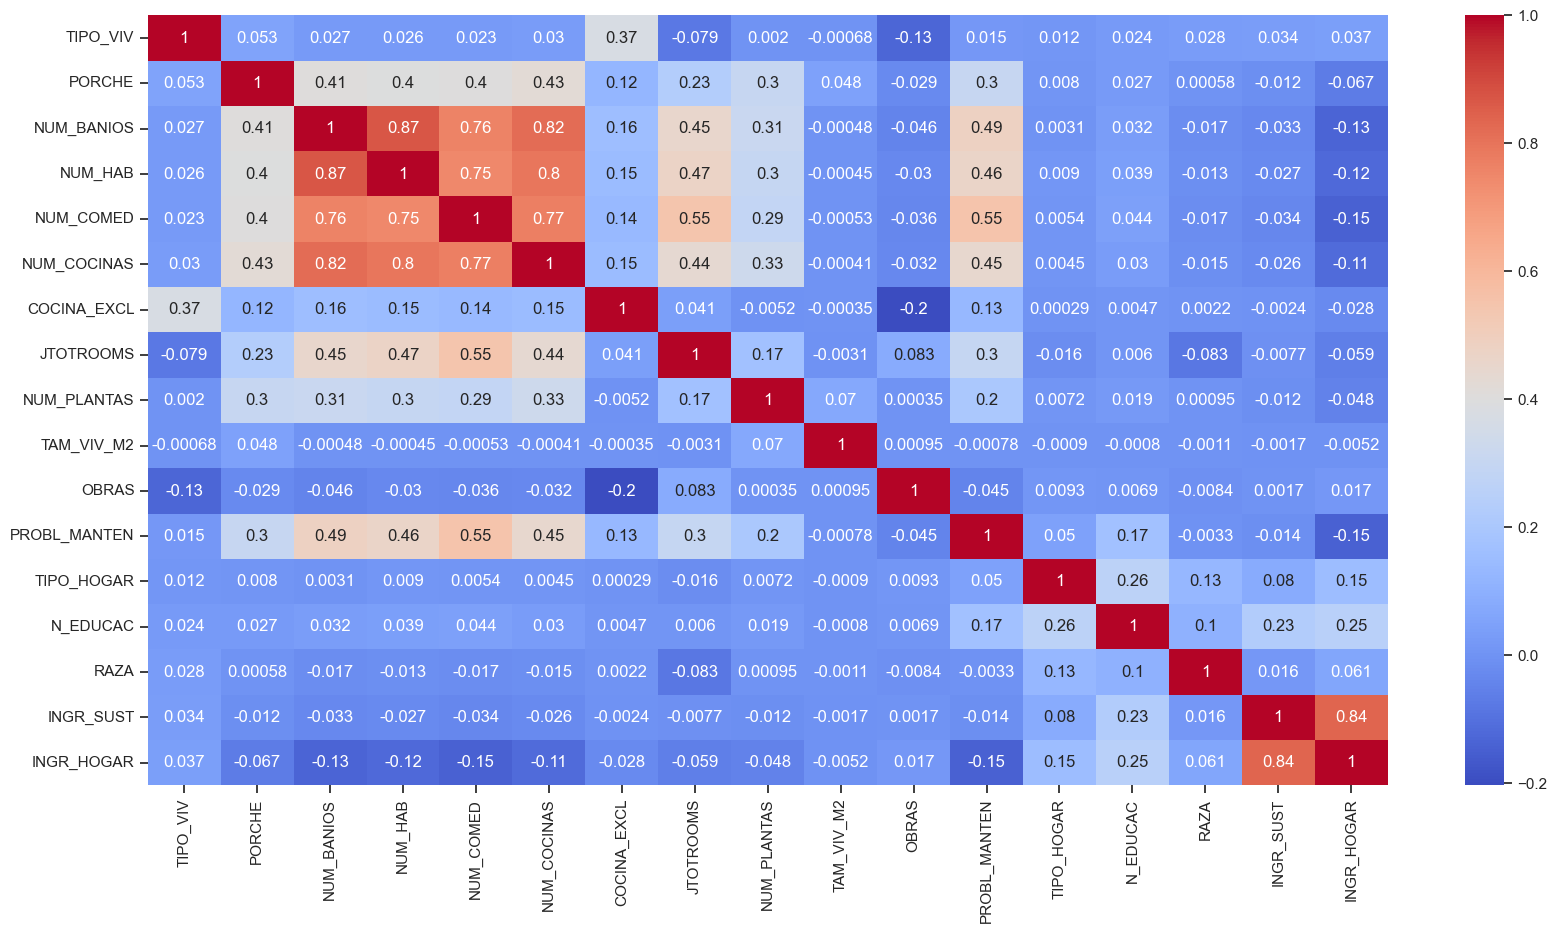

In [63]:
print(df2016.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2016.corr(), annot=True, cmap='coolwarm')
plt.show()


              TIPO_VIV    PORCHE   NUM_HAB  NUM_COMED  NUM_COCINAS  \
TIPO_VIV      1.000000  0.052546  0.025780   0.022613     0.030498   
PORCHE        0.052546  1.000000  0.395016   0.401692     0.425059   
NUM_HAB       0.025780  0.395016  1.000000   0.750045     0.797570   
NUM_COMED     0.022613  0.401692  0.750045   1.000000     0.770568   
NUM_COCINAS   0.030498  0.425059  0.797570   0.770568     1.000000   
COCINA_EXCL   0.370409  0.122953  0.147505   0.139166     0.147376   
JTOTROOMS    -0.078903  0.230820  0.472043   0.547819     0.438818   
NUM_PLANTAS   0.001966  0.302251  0.298968   0.286019     0.330555   
TAM_VIV_M2   -0.000680  0.047907 -0.000452  -0.000533    -0.000413   
OBRAS        -0.128707 -0.029051 -0.030250  -0.035911    -0.031952   
PROBL_MANTEN  0.014630  0.303558  0.464216   0.552717     0.447107   
TIPO_HOGAR    0.011837  0.008041  0.008986   0.005434     0.004523   
N_EDUCAC      0.023686  0.026518  0.038737   0.044421     0.029754   
RAZA          0.0279

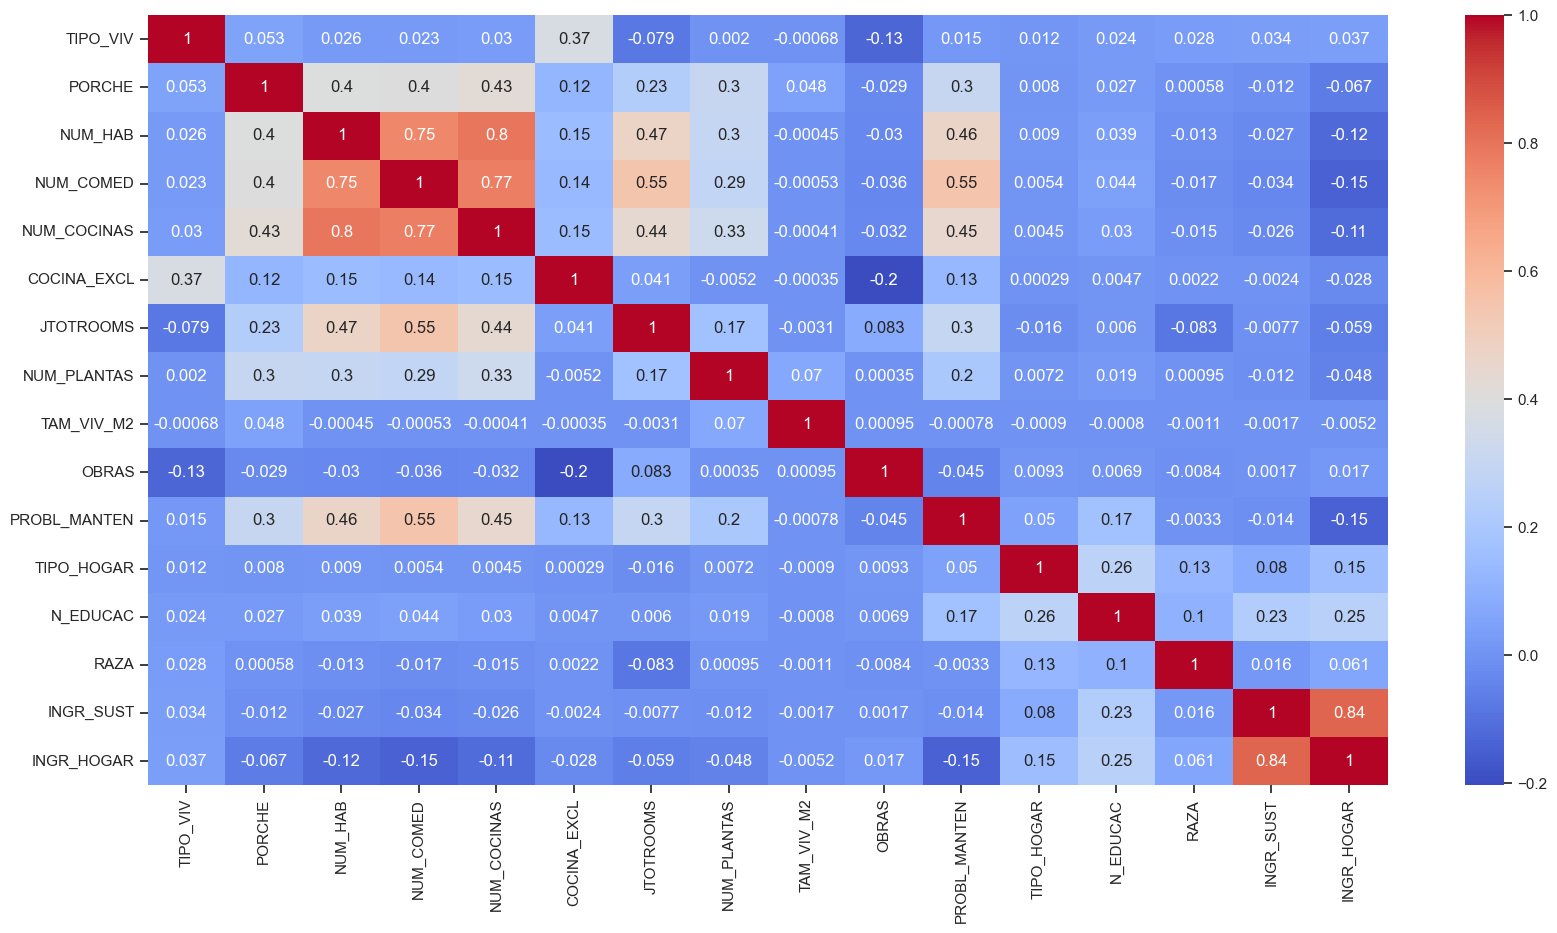

In [64]:
#Eliminamos NUM_BANIOS
df2016.drop('NUM_BANIOS', axis=1, inplace=True)
#Comprobamos que esté todo bien ahora
print(df2016.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2016.corr(), annot=True, cmap='coolwarm')
plt.show()

# 2018

              TIPO_VIV    PORCHE  NUM_BANIOS   NUM_HAB  NUM_COMED  \
TIPO_VIV      1.000000  0.030212    0.015610  0.011996   0.009742   
PORCHE        0.030212  1.000000    0.310281  0.427169   0.420593   
NUM_BANIOS    0.015610  0.310281    1.000000  0.601727   0.565334   
NUM_HAB       0.011996  0.427169    0.601727  1.000000   0.760119   
NUM_COMED     0.009742  0.420593    0.565334  0.760119   1.000000   
NUM_COCINAS   0.011904  0.452402    0.572109  0.858881   0.779830   
COCINA_EXCL   0.270260  0.129911    0.107382  0.129497   0.131356   
JTOTROOMS    -0.089306  0.228612    0.265449  0.451224   0.526710   
NUM_PLANTAS   0.074742  0.326548    0.223594  0.292853   0.267355   
TAM_VIV_M2    0.002056  0.011564    0.076420  0.111656   0.093967   
OBRAS        -0.132731 -0.012036   -0.385657  0.009176  -0.019738   
PROBL_MANTEN  0.009522  0.307209    0.453907  0.472434   0.550307   
TIPO_HOGAR   -0.002075  0.008890   -0.046116 -0.006867  -0.007985   
N_EDUCAC      0.024535  0.018574  

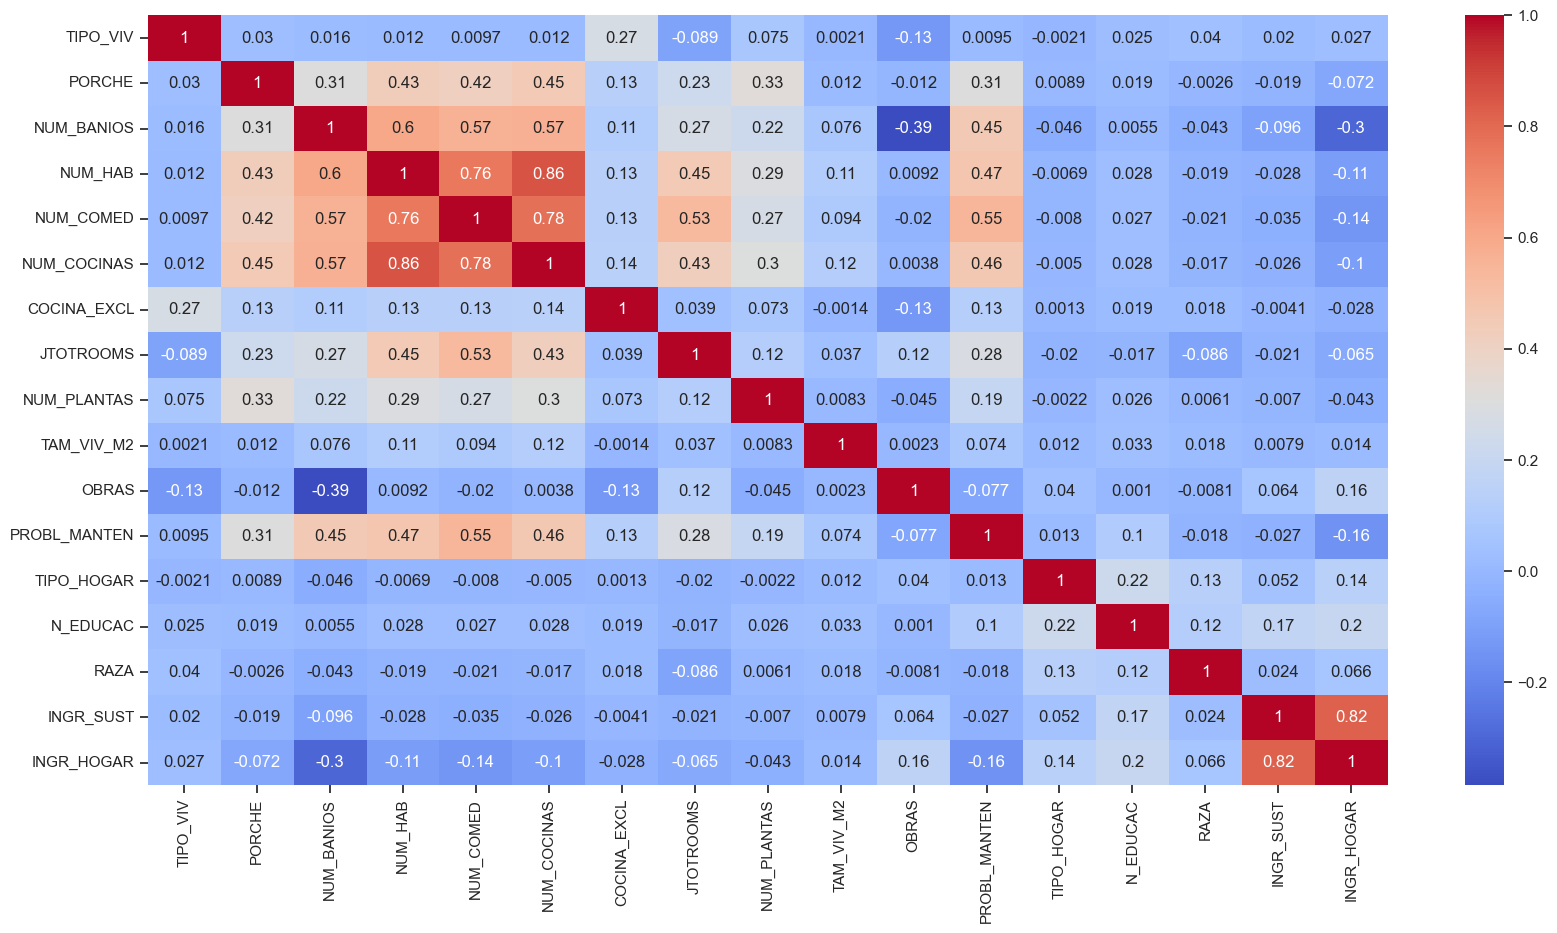

In [65]:
print(df2018.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2018.corr(), annot=True, cmap='coolwarm')
plt.show()

              TIPO_VIV    PORCHE  NUM_BANIOS   NUM_HAB  NUM_COMED  \
TIPO_VIV      1.000000  0.030212    0.015610  0.011996   0.009742   
PORCHE        0.030212  1.000000    0.310281  0.427169   0.420593   
NUM_BANIOS    0.015610  0.310281    1.000000  0.601727   0.565334   
NUM_HAB       0.011996  0.427169    0.601727  1.000000   0.760119   
NUM_COMED     0.009742  0.420593    0.565334  0.760119   1.000000   
COCINA_EXCL   0.270260  0.129911    0.107382  0.129497   0.131356   
JTOTROOMS    -0.089306  0.228612    0.265449  0.451224   0.526710   
NUM_PLANTAS   0.074742  0.326548    0.223594  0.292853   0.267355   
TAM_VIV_M2    0.002056  0.011564    0.076420  0.111656   0.093967   
OBRAS        -0.132731 -0.012036   -0.385657  0.009176  -0.019738   
PROBL_MANTEN  0.009522  0.307209    0.453907  0.472434   0.550307   
TIPO_HOGAR   -0.002075  0.008890   -0.046116 -0.006867  -0.007985   
N_EDUCAC      0.024535  0.018574    0.005488  0.028238   0.026597   
RAZA          0.039539 -0.002621  

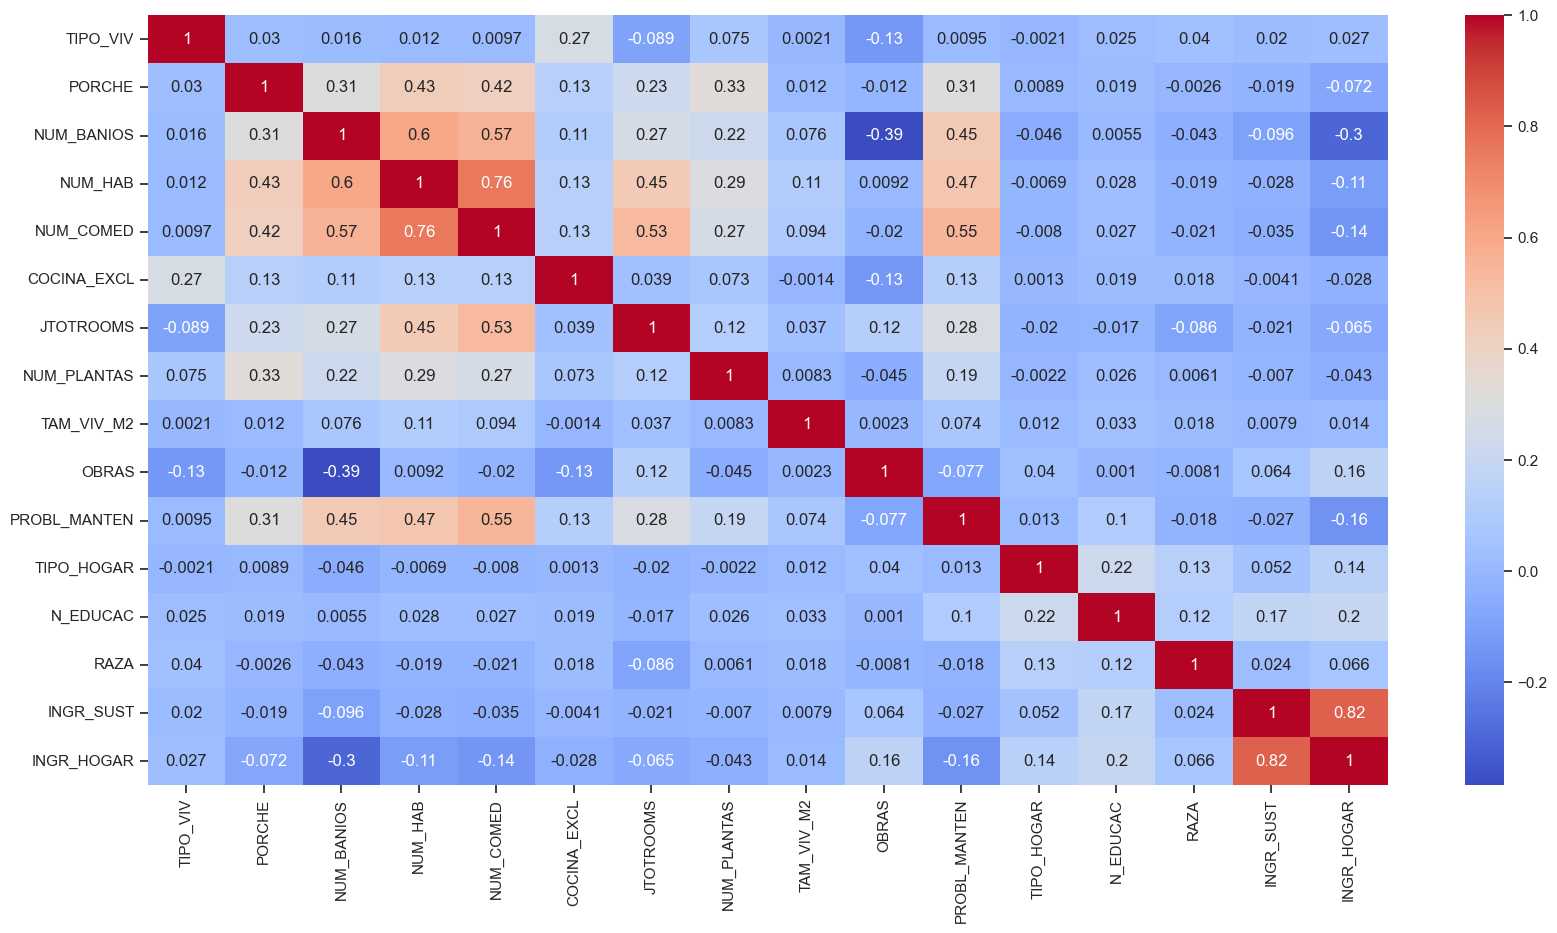

In [66]:
#Eliminamos NUM_COCINAS
df2018.drop('NUM_COCINAS', axis=1, inplace=True)
#Comprobamos que esté todo bien ahora
print(df2018.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2018.corr(), annot=True, cmap='coolwarm')
plt.show()

# 2020

              TIPO_VIV    PORCHE  NUM_BANIOS   NUM_HAB  NUM_COMED  \
TIPO_VIV      1.000000  0.025903    0.008148  0.009671   0.003833   
PORCHE        0.025903  1.000000    0.477621  0.477938   0.441359   
NUM_BANIOS    0.008148  0.477621    1.000000  0.882587   0.794448   
NUM_HAB       0.009671  0.477938    0.882587  1.000000   0.767119   
NUM_COMED     0.003833  0.441359    0.794448  0.767119   1.000000   
NUM_COCINAS   0.010690  0.496413    0.843550  0.857956   0.782704   
COCINA_EXCL   0.259097  0.118627    0.158494  0.150850   0.148582   
JTOTROOMS    -0.101992  0.256202    0.475987  0.479937   0.558772   
NUM_PLANTAS   0.147282  0.377968    0.372529  0.372214   0.331170   
TAM_VIV_M2   -0.004599  0.017977    0.004440  0.004602   0.003115   
OBRAS        -0.126658 -0.006179   -0.017805 -0.009487  -0.011619   
PROBL_MANTEN -0.000986  0.321810    0.491586  0.454954   0.521158   
TIPO_HOGAR    0.002191  0.004889   -0.014865 -0.012087  -0.013867   
N_EDUCAC      0.018967  0.023930  

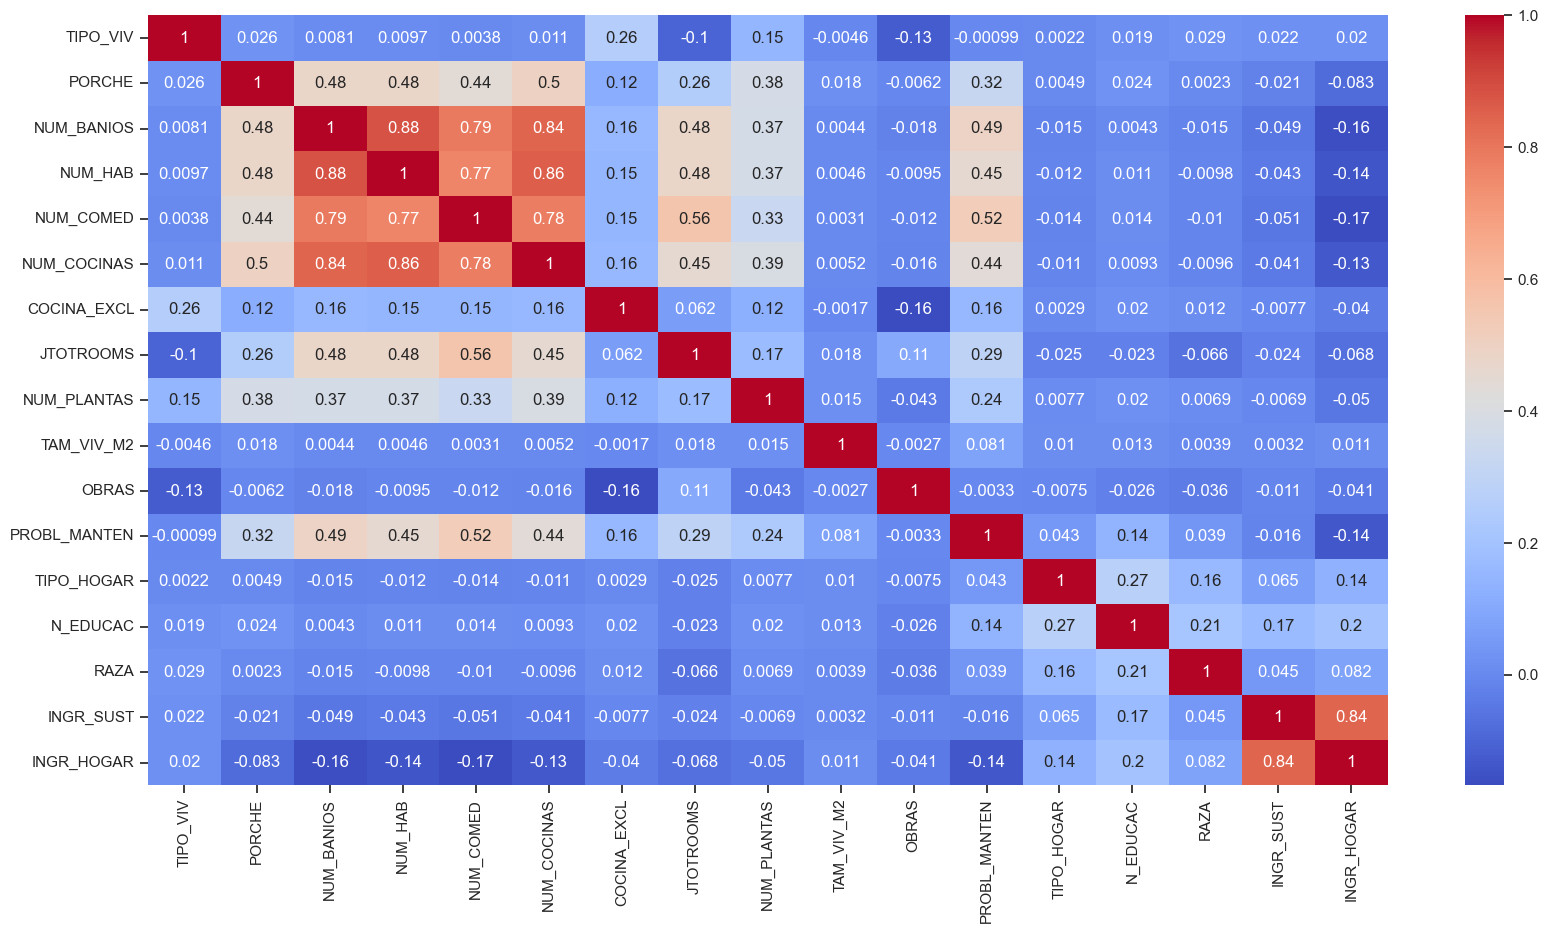

In [67]:
print(df2020.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2020.corr(), annot=True, cmap='coolwarm')
plt.show()

              TIPO_VIV    PORCHE   NUM_HAB  NUM_COMED  COCINA_EXCL  JTOTROOMS  \
TIPO_VIV      1.000000  0.025903  0.009671   0.003833     0.259097  -0.101992   
PORCHE        0.025903  1.000000  0.477938   0.441359     0.118627   0.256202   
NUM_HAB       0.009671  0.477938  1.000000   0.767119     0.150850   0.479937   
NUM_COMED     0.003833  0.441359  0.767119   1.000000     0.148582   0.558772   
COCINA_EXCL   0.259097  0.118627  0.150850   0.148582     1.000000   0.062434   
JTOTROOMS    -0.101992  0.256202  0.479937   0.558772     0.062434   1.000000   
NUM_PLANTAS   0.147282  0.377968  0.372214   0.331170     0.123736   0.170874   
TAM_VIV_M2   -0.004599  0.017977  0.004602   0.003115    -0.001682   0.018024   
OBRAS        -0.126658 -0.006179 -0.009487  -0.011619    -0.163716   0.105477   
PROBL_MANTEN -0.000986  0.321810  0.454954   0.521158     0.157981   0.290382   
TIPO_HOGAR    0.002191  0.004889 -0.012087  -0.013867     0.002865  -0.024957   
N_EDUCAC      0.018967  0.02

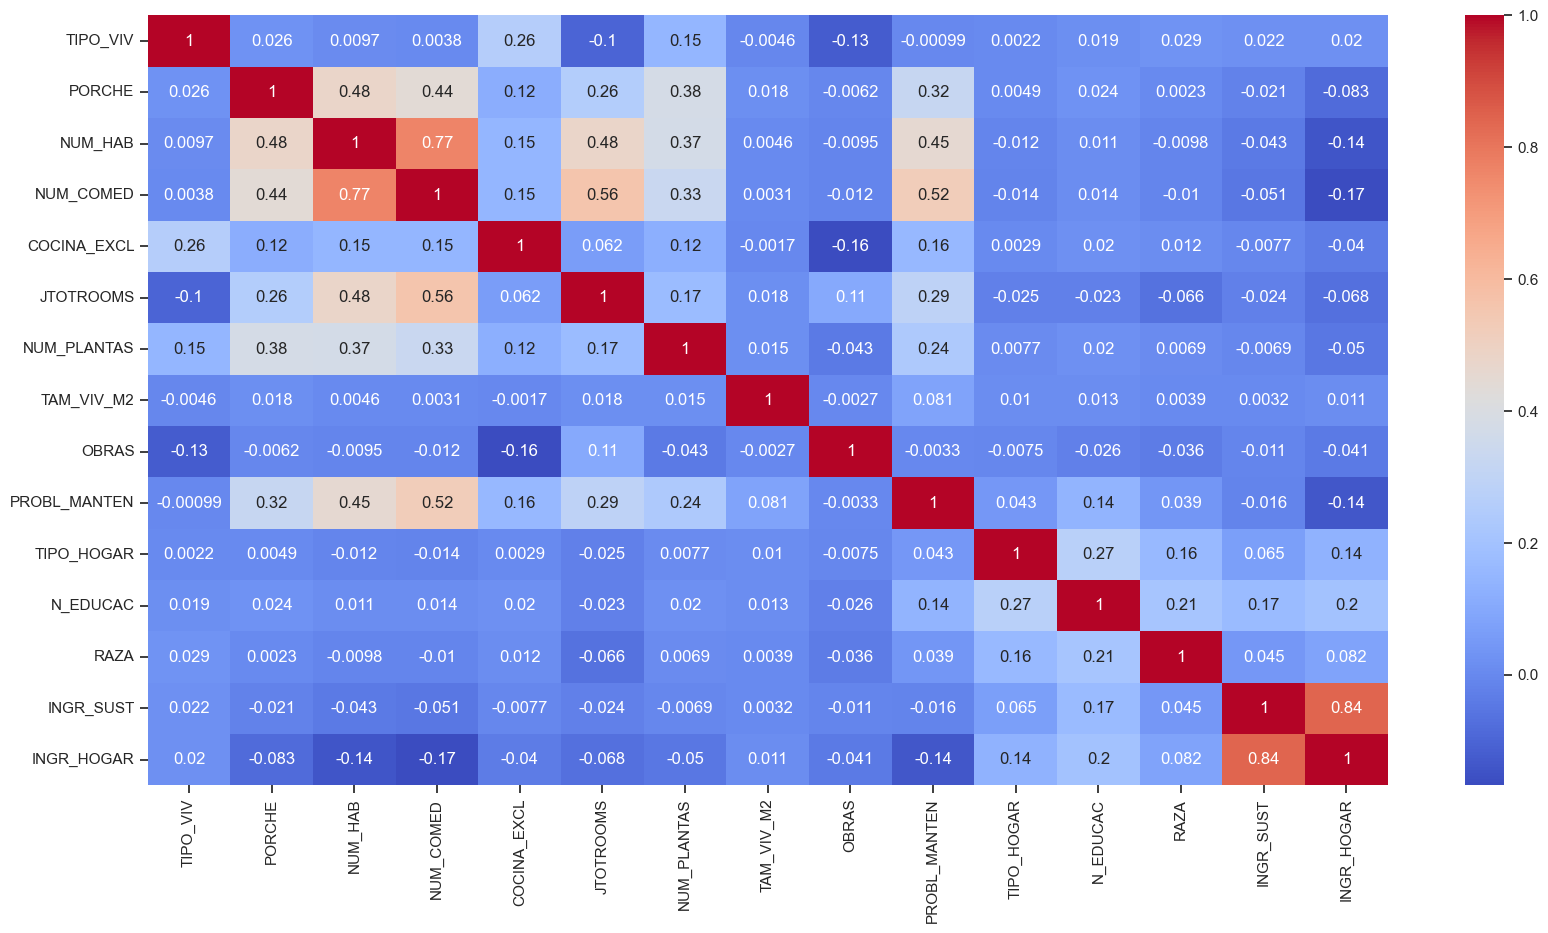

In [68]:
#Eliminamos NUM_COCINAS, NUM_BANIOS
df2020.drop(['NUM_COCINAS','NUM_BANIOS'], axis=1, inplace=True)
#Comprobamos que esté todo bien ahora
print(df2020.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2020.corr(), annot=True, cmap='coolwarm')
plt.show()

# 2022

              TIPO_VIV    PORCHE  NUM_BANIOS   NUM_HAB  NUM_COMED  \
TIPO_VIV      1.000000  0.063563    0.054639  0.056237   0.046304   
PORCHE        0.063563  1.000000    0.469496  0.442567   0.433705   
NUM_BANIOS    0.054639  0.469496    1.000000  0.899247   0.824699   
NUM_HAB       0.056237  0.442567    0.899247  1.000000   0.784589   
NUM_COMED     0.046304  0.433705    0.824699  0.784589   1.000000   
NUM_COCINAS   0.055814  0.463417    0.865407  0.871467   0.797861   
COCINA_EXCL   0.103540  0.237760    0.293416  0.284518   0.276032   
JTOTROOMS    -0.042029  0.248885    0.483807  0.481379   0.546530   
NUM_PLANTAS   0.102488  0.347159    0.377521  0.367504   0.340943   
TAM_VIV_M2    0.008162  0.007861    0.004581  0.004591   0.003307   
OBRAS        -0.090914 -0.022858   -0.025465 -0.016075  -0.020453   
PROBL_MANTEN  0.041920  0.329823    0.541458  0.501800   0.561468   
TIPO_HOGAR    0.005492 -0.001674   -0.017716 -0.015750  -0.013286   
N_EDUCAC      0.028328  0.026356  

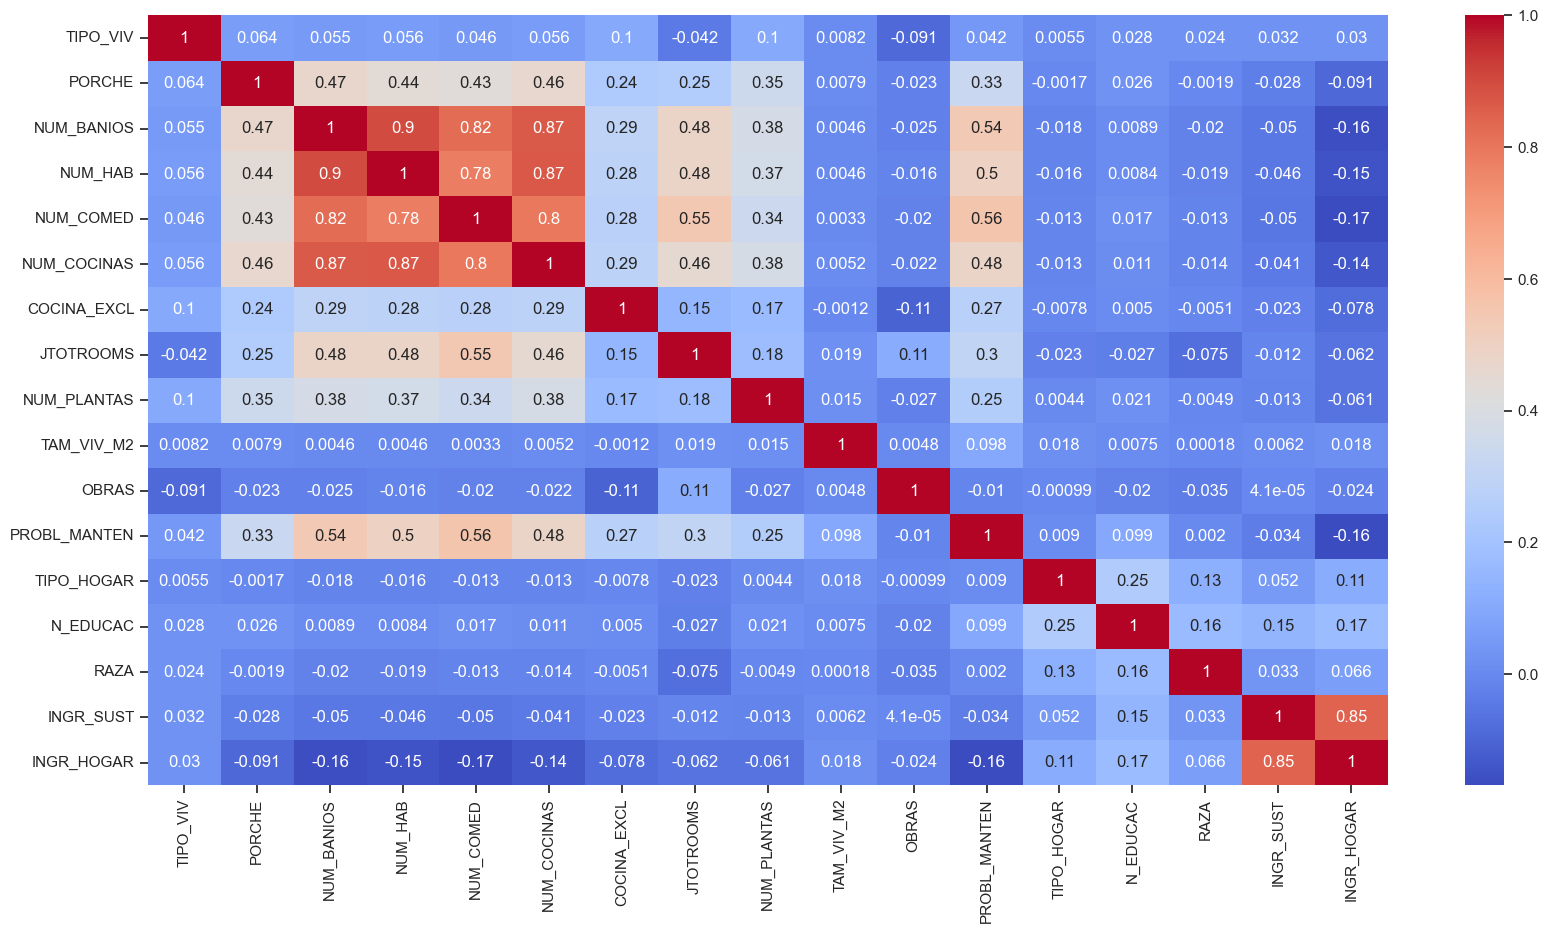

In [69]:
print(df2022.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2022.corr(), annot=True, cmap='coolwarm')
plt.show()

              TIPO_VIV    PORCHE   NUM_HAB  NUM_COMED  COCINA_EXCL  JTOTROOMS  \
TIPO_VIV      1.000000  0.063563  0.056237   0.046304     0.103540  -0.042029   
PORCHE        0.063563  1.000000  0.442567   0.433705     0.237760   0.248885   
NUM_HAB       0.056237  0.442567  1.000000   0.784589     0.284518   0.481379   
NUM_COMED     0.046304  0.433705  0.784589   1.000000     0.276032   0.546530   
COCINA_EXCL   0.103540  0.237760  0.284518   0.276032     1.000000   0.150082   
JTOTROOMS    -0.042029  0.248885  0.481379   0.546530     0.150082   1.000000   
NUM_PLANTAS   0.102488  0.347159  0.367504   0.340943     0.165357   0.175466   
TAM_VIV_M2    0.008162  0.007861  0.004591   0.003307    -0.001205   0.019125   
OBRAS        -0.090914 -0.022858 -0.016075  -0.020453    -0.105830   0.113168   
PROBL_MANTEN  0.041920  0.329823  0.501800   0.561468     0.270140   0.302535   
TIPO_HOGAR    0.005492 -0.001674 -0.015750  -0.013286    -0.007818  -0.023250   
N_EDUCAC      0.028328  0.02

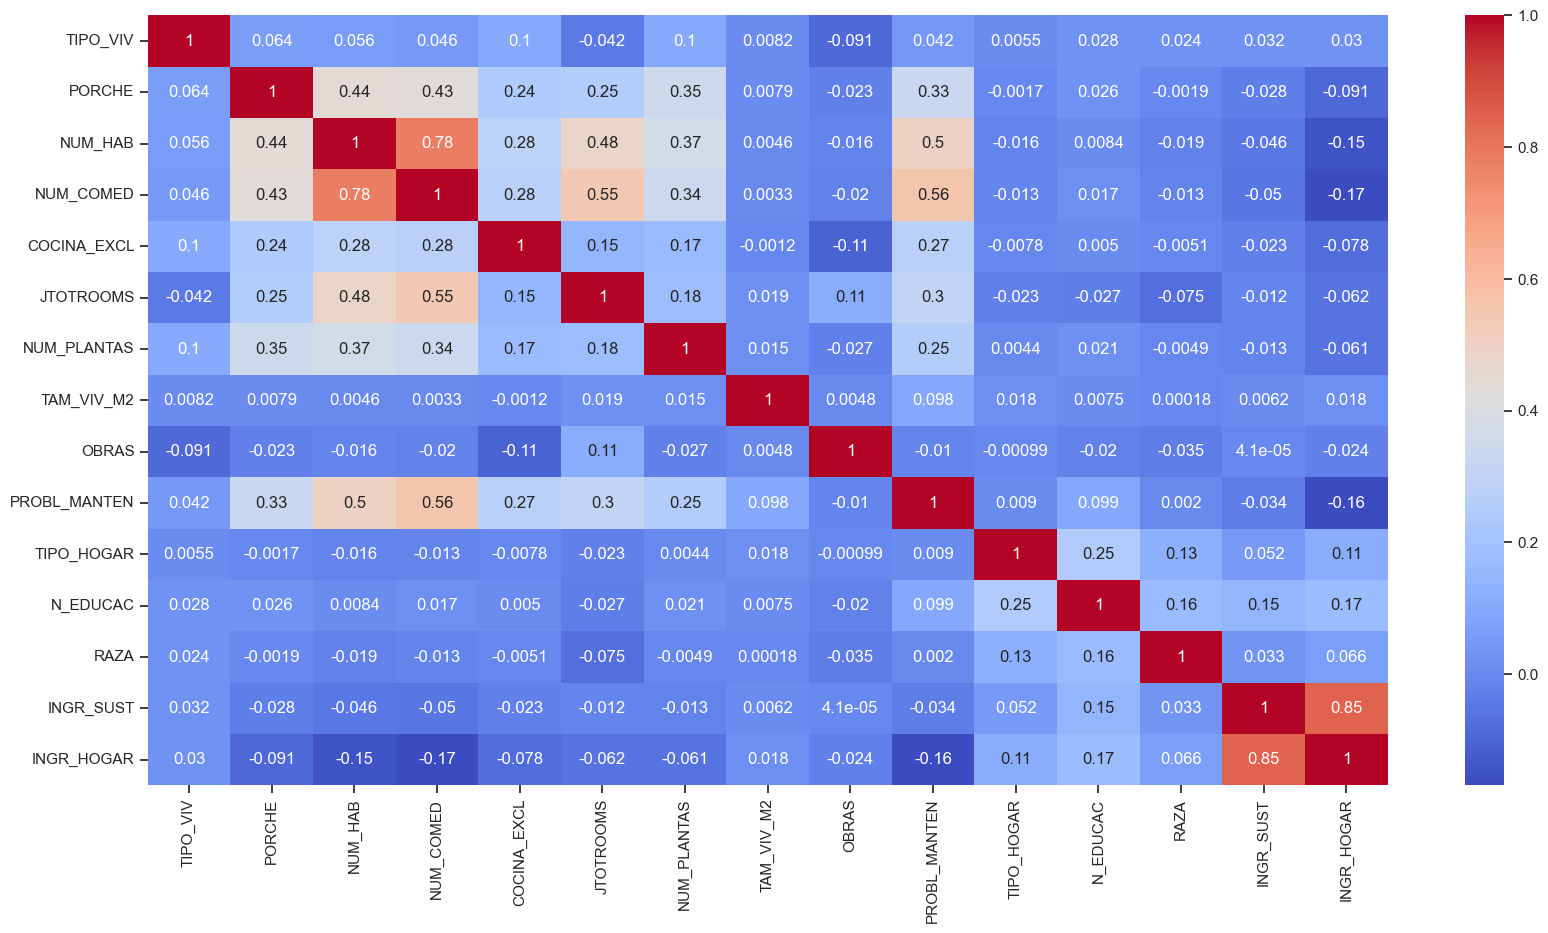

In [70]:
#Eliminamos NUM_COCINAS, NUM_BANIOS, 
df2022.drop(['NUM_COCINAS','NUM_BANIOS'], axis=1, inplace=True)
#Comprobamos que esté todo bien ahora
print(df2022.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2022.corr(), annot=True, cmap='coolwarm')
plt.show()

Ahora vamos a estudiar los outliers en los 4 datasets y los vamos a eliminar:

## 2016

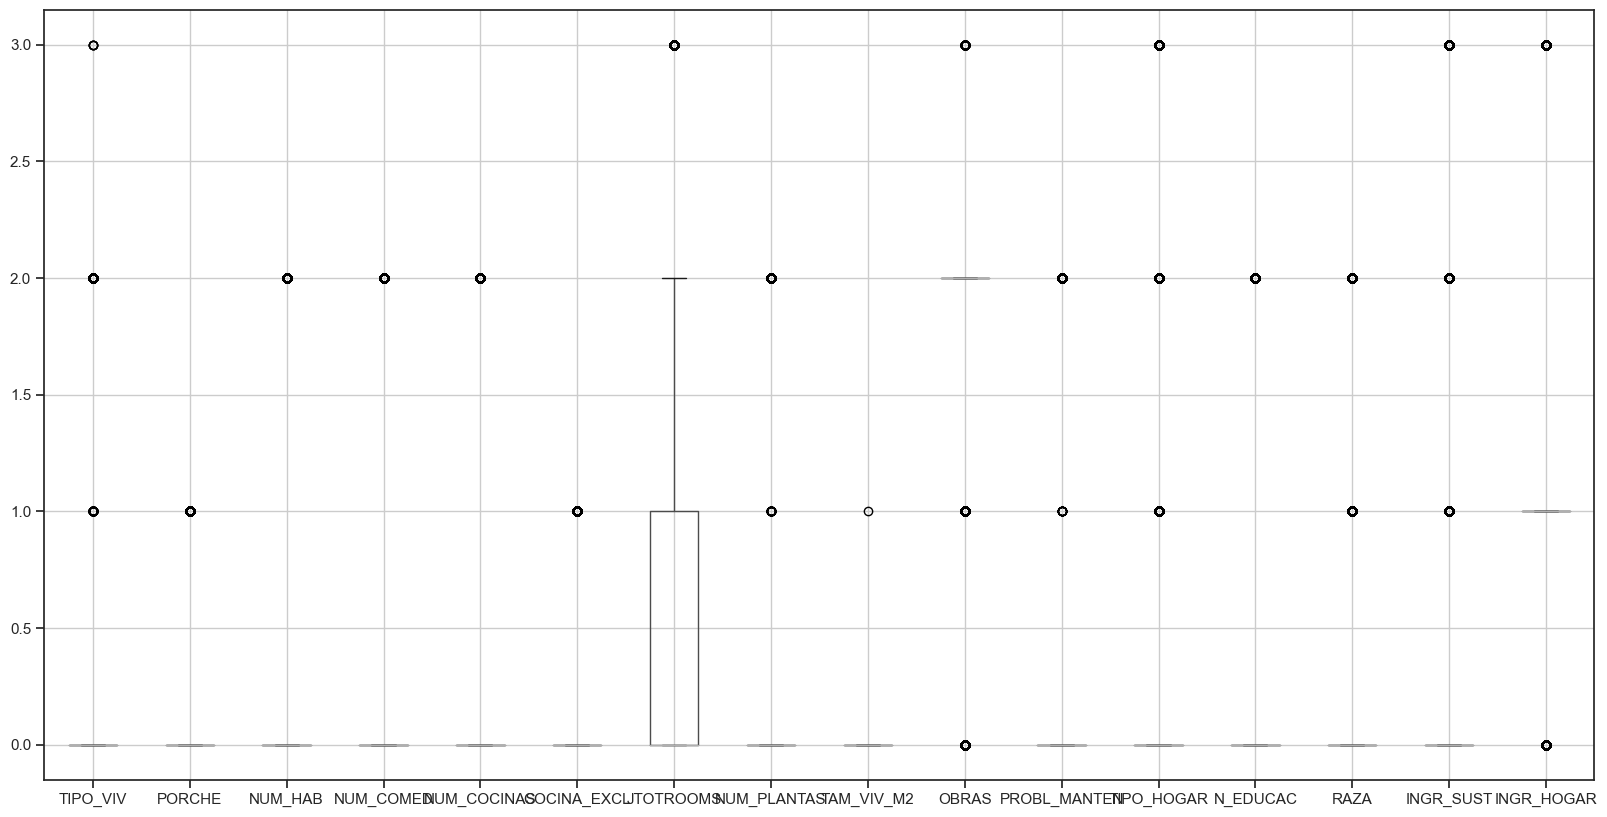

In [71]:
df2016.boxplot(figsize=(20,10))
plt.show()

# 2018

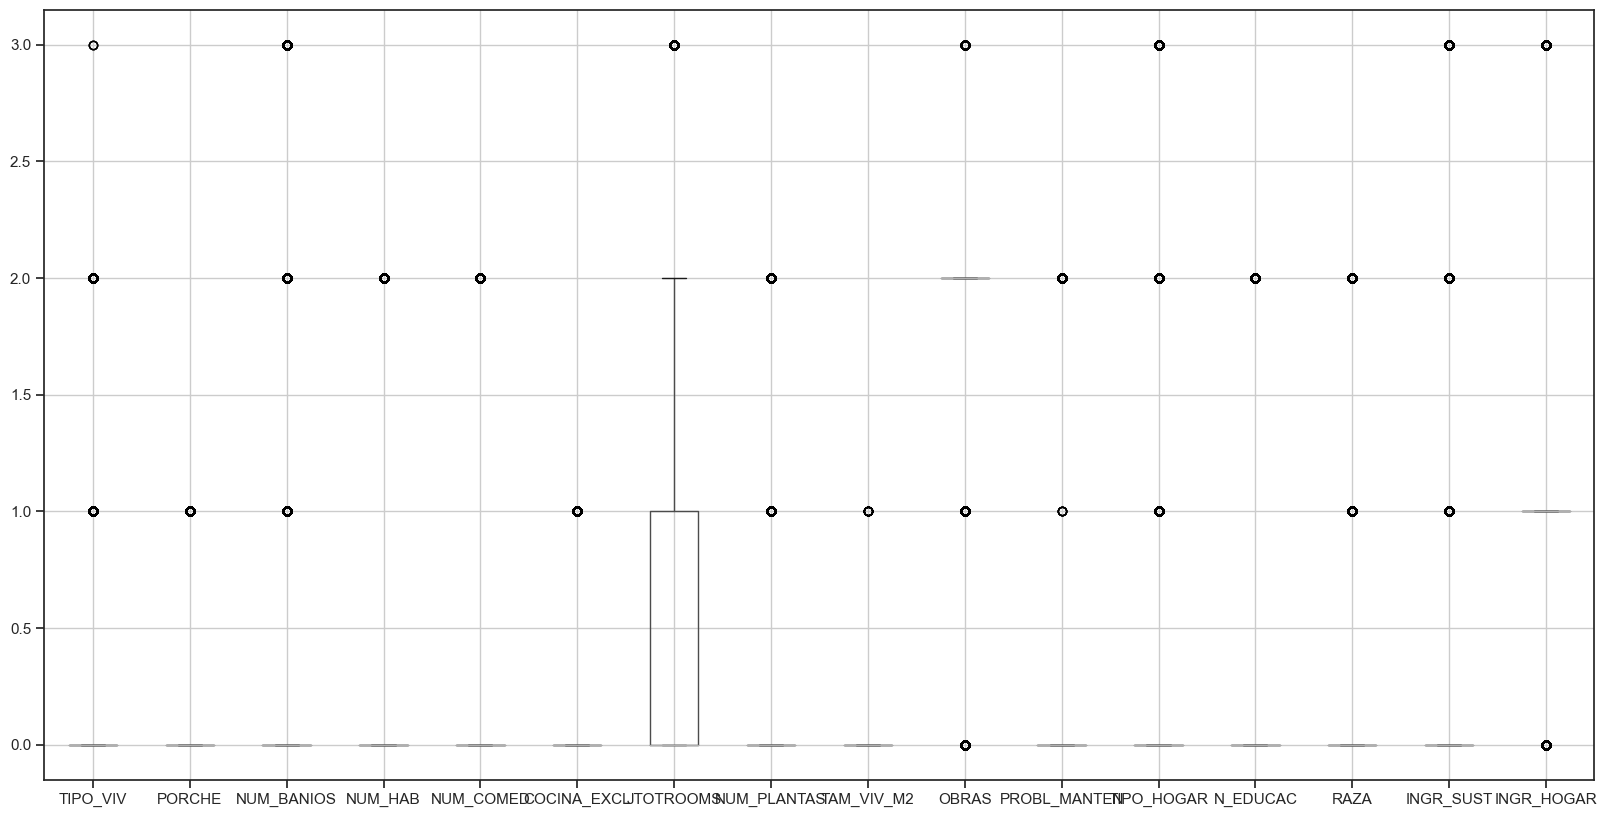

In [72]:
df2018.boxplot(figsize=(20,10))
plt.show()

# 2020

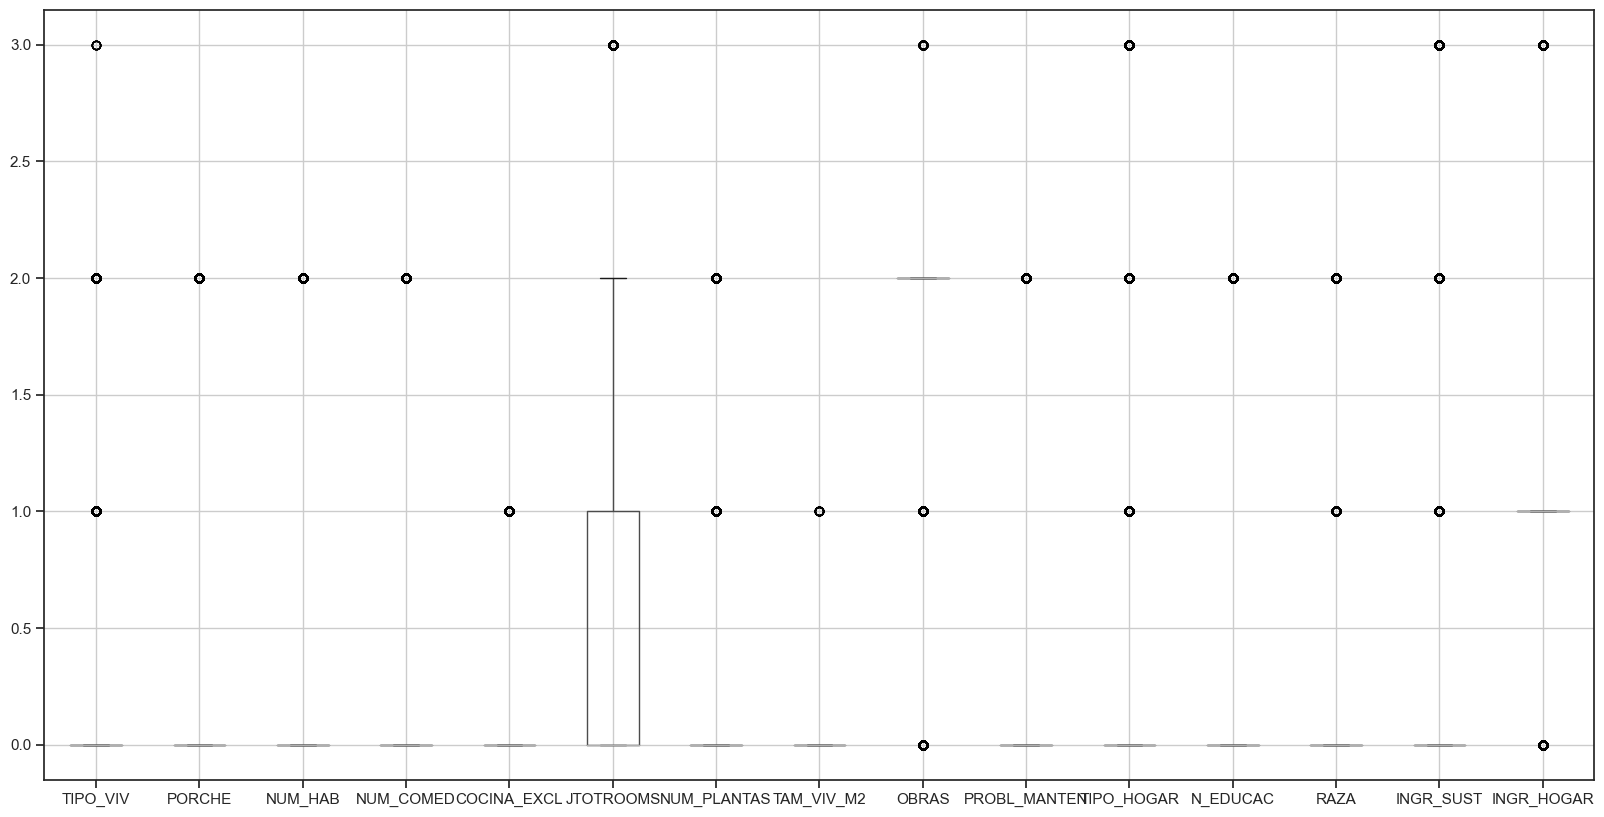

In [73]:
df2020.boxplot(figsize=(20,10))
plt.show()

# 2022

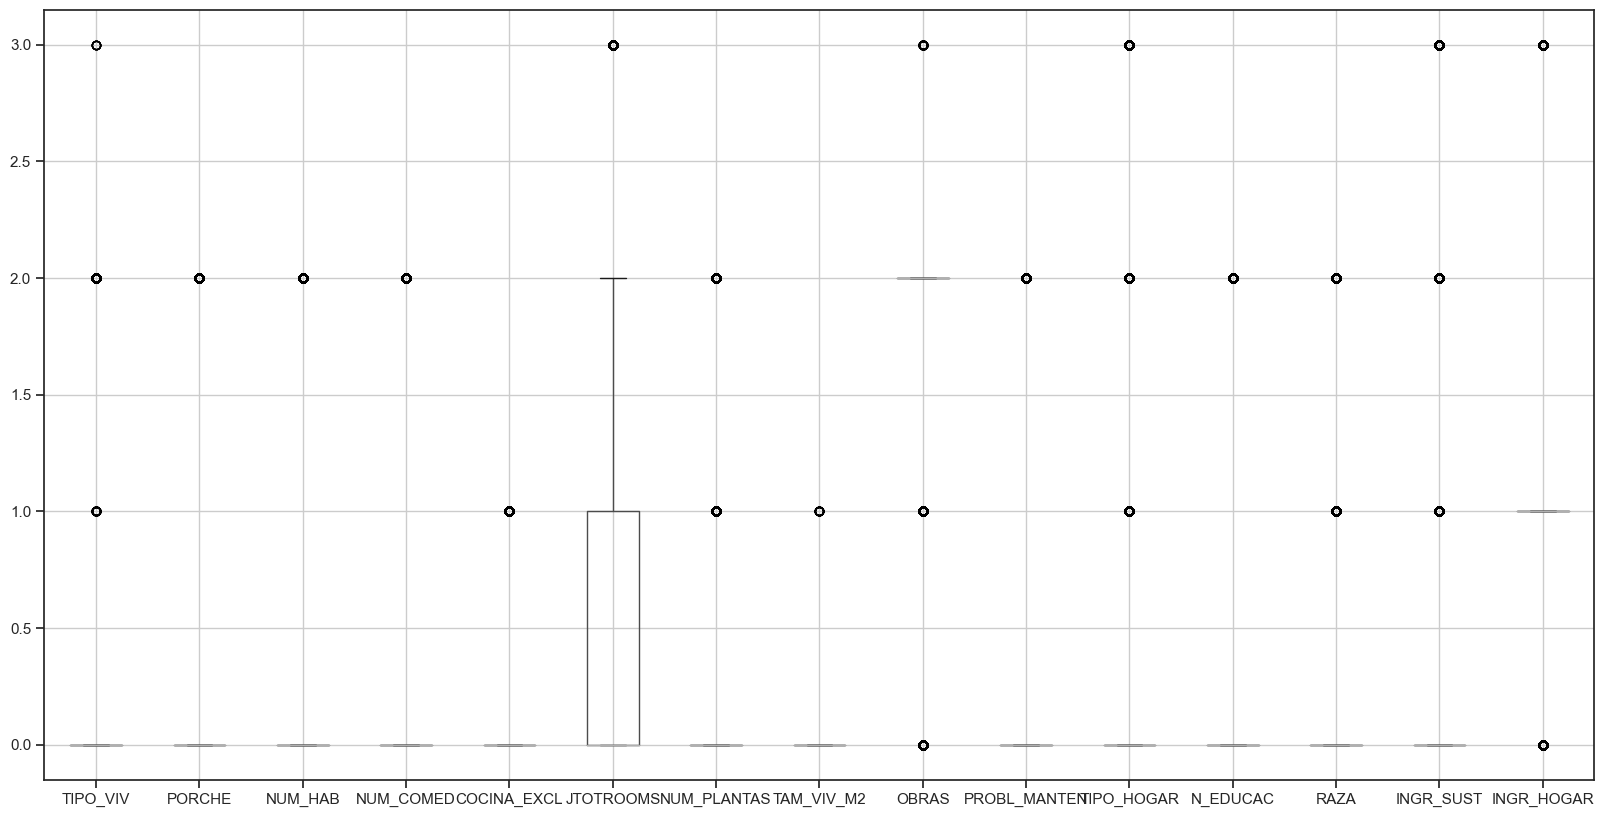

In [74]:
df2022.boxplot(figsize=(20,10))
plt.show()

Como podemos observar en los diagramas de caja anteriores, todos los valores están en un rango de 0 a 3, lo que significa que están codificados.

Ahora visualizaremos la distribución de nuestros 4 datasets:

# 2016

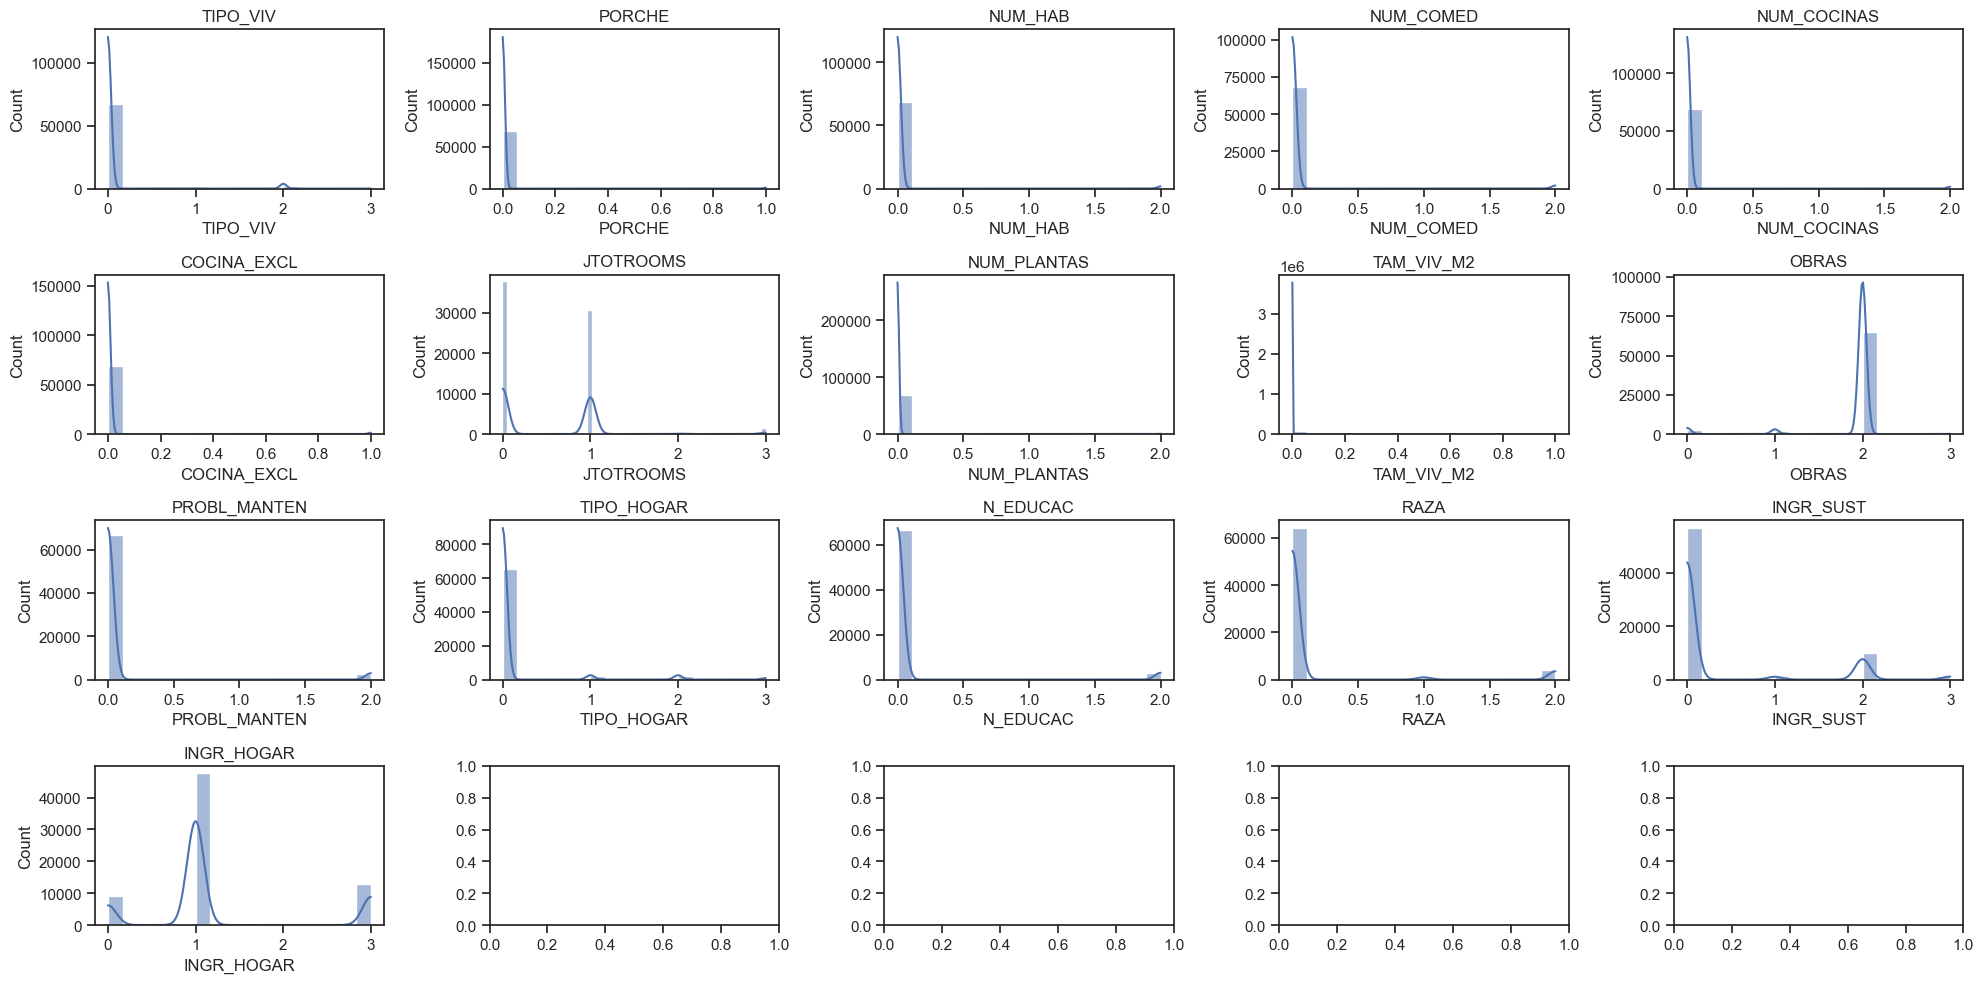

In [75]:
num_rows = 4
num_cols = 5
variable_names = list(df2016.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=df2016[var_name], ax=ax, kde=True)
    ax.set_title(var_name)
plt.tight_layout()
plt.show()

# 2018

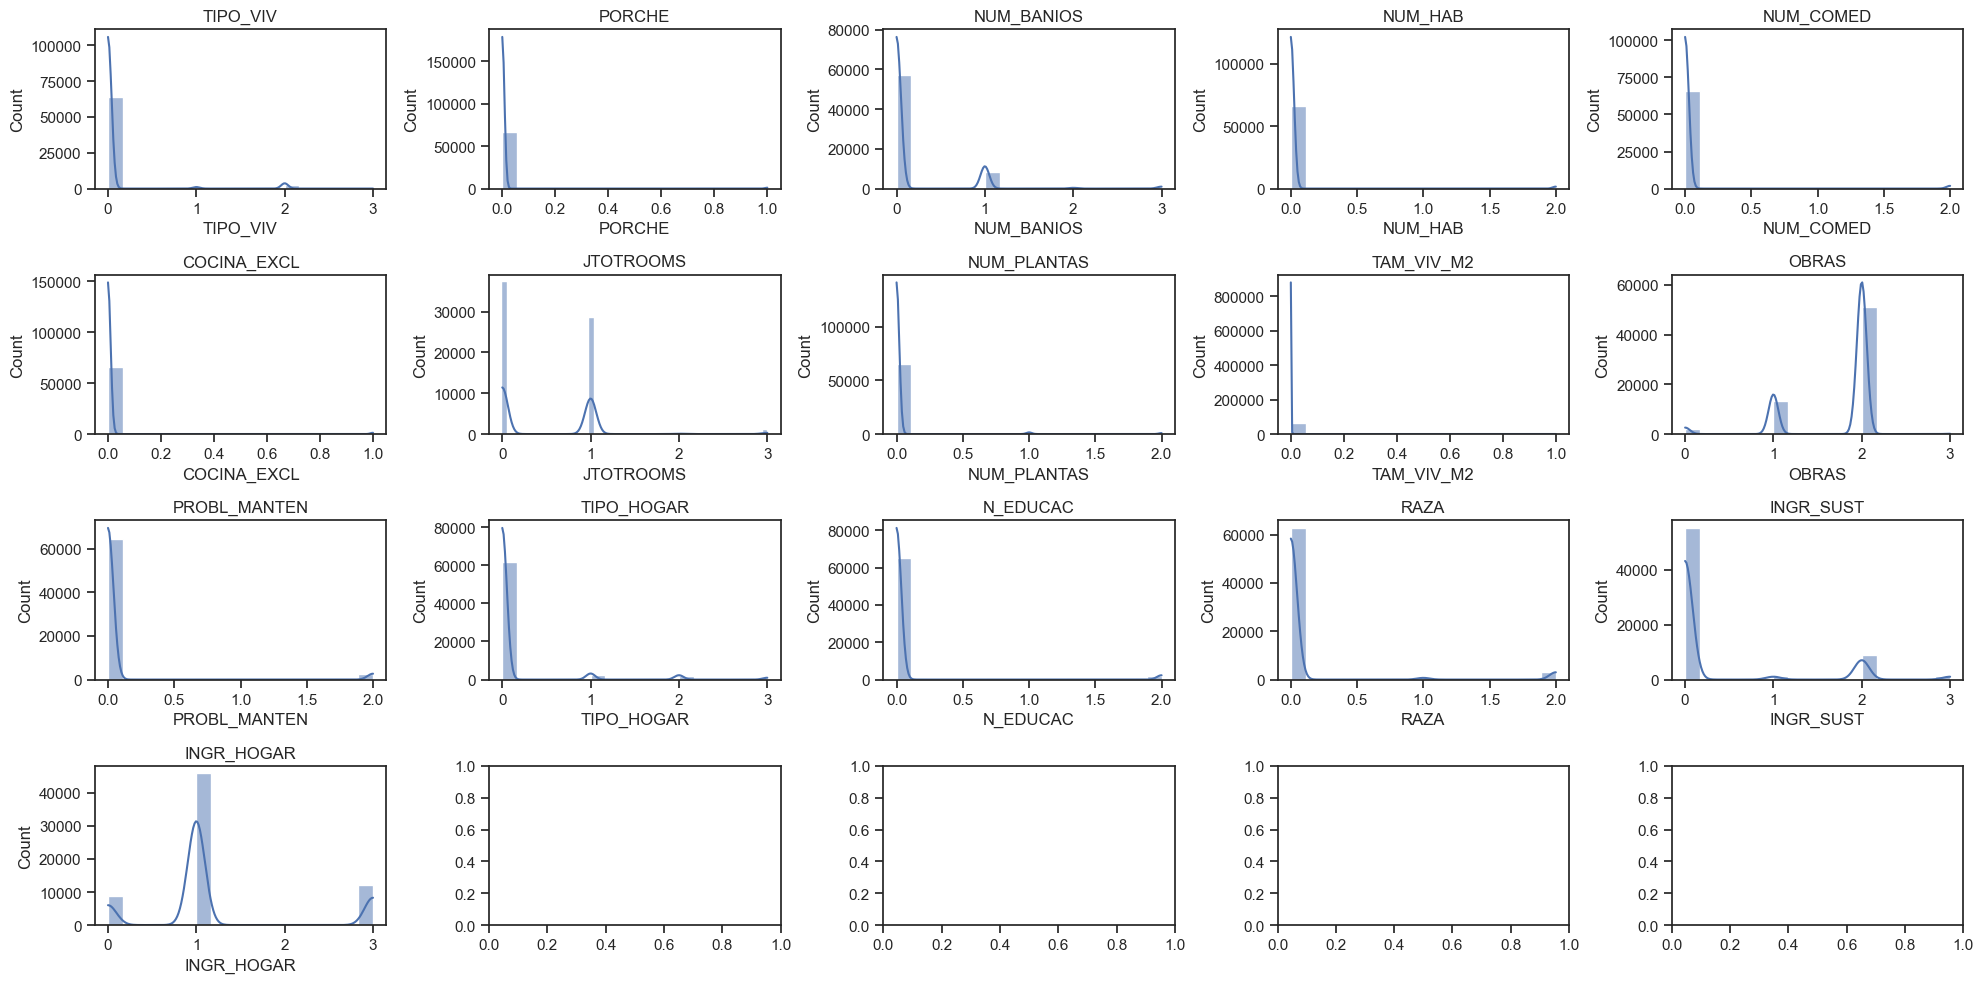

In [76]:
num_rows = 4
num_cols = 5
variable_names = list(df2018.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=df2018[var_name], ax=ax, kde=True)
    ax.set_title(var_name)
plt.tight_layout()
plt.show()

# 2020

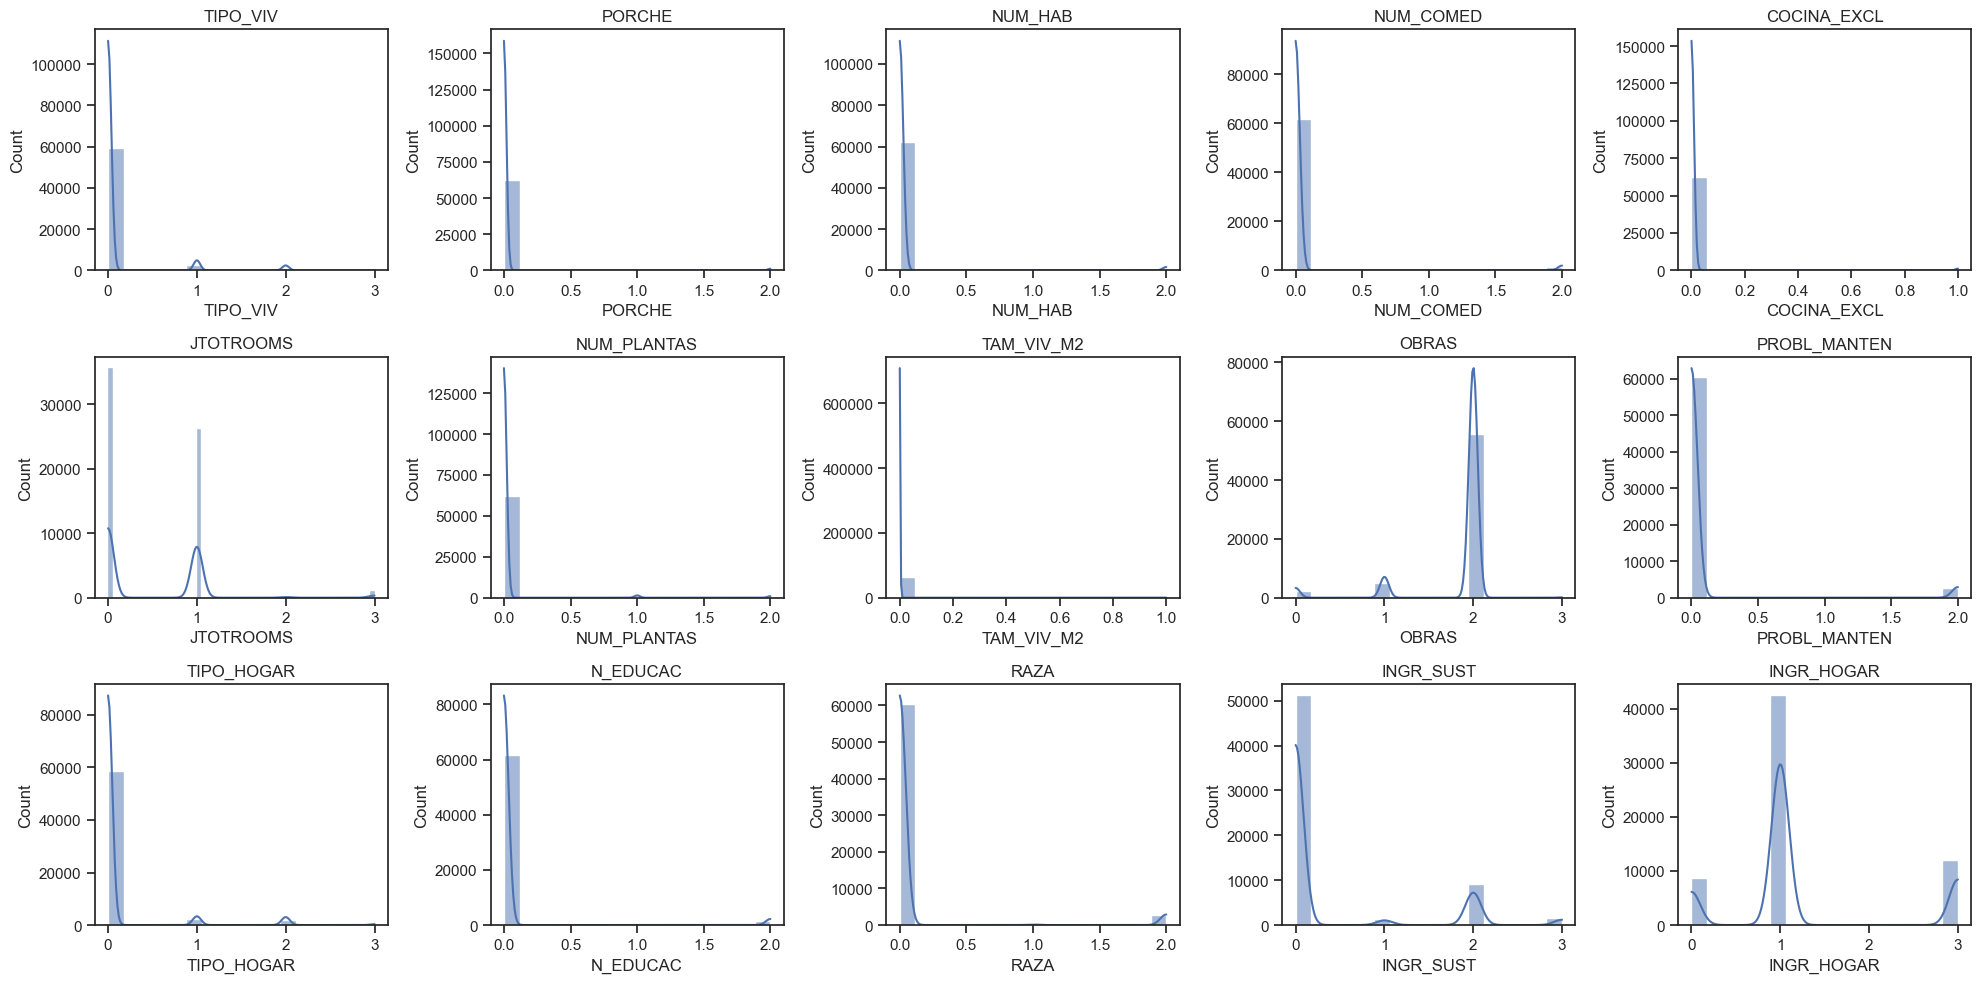

In [77]:
num_rows = 3
num_cols = 5
variable_names = list(df2020.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=df2020[var_name], ax=ax, kde=True)
    ax.set_title(var_name)
plt.tight_layout()
plt.show()

# 2022

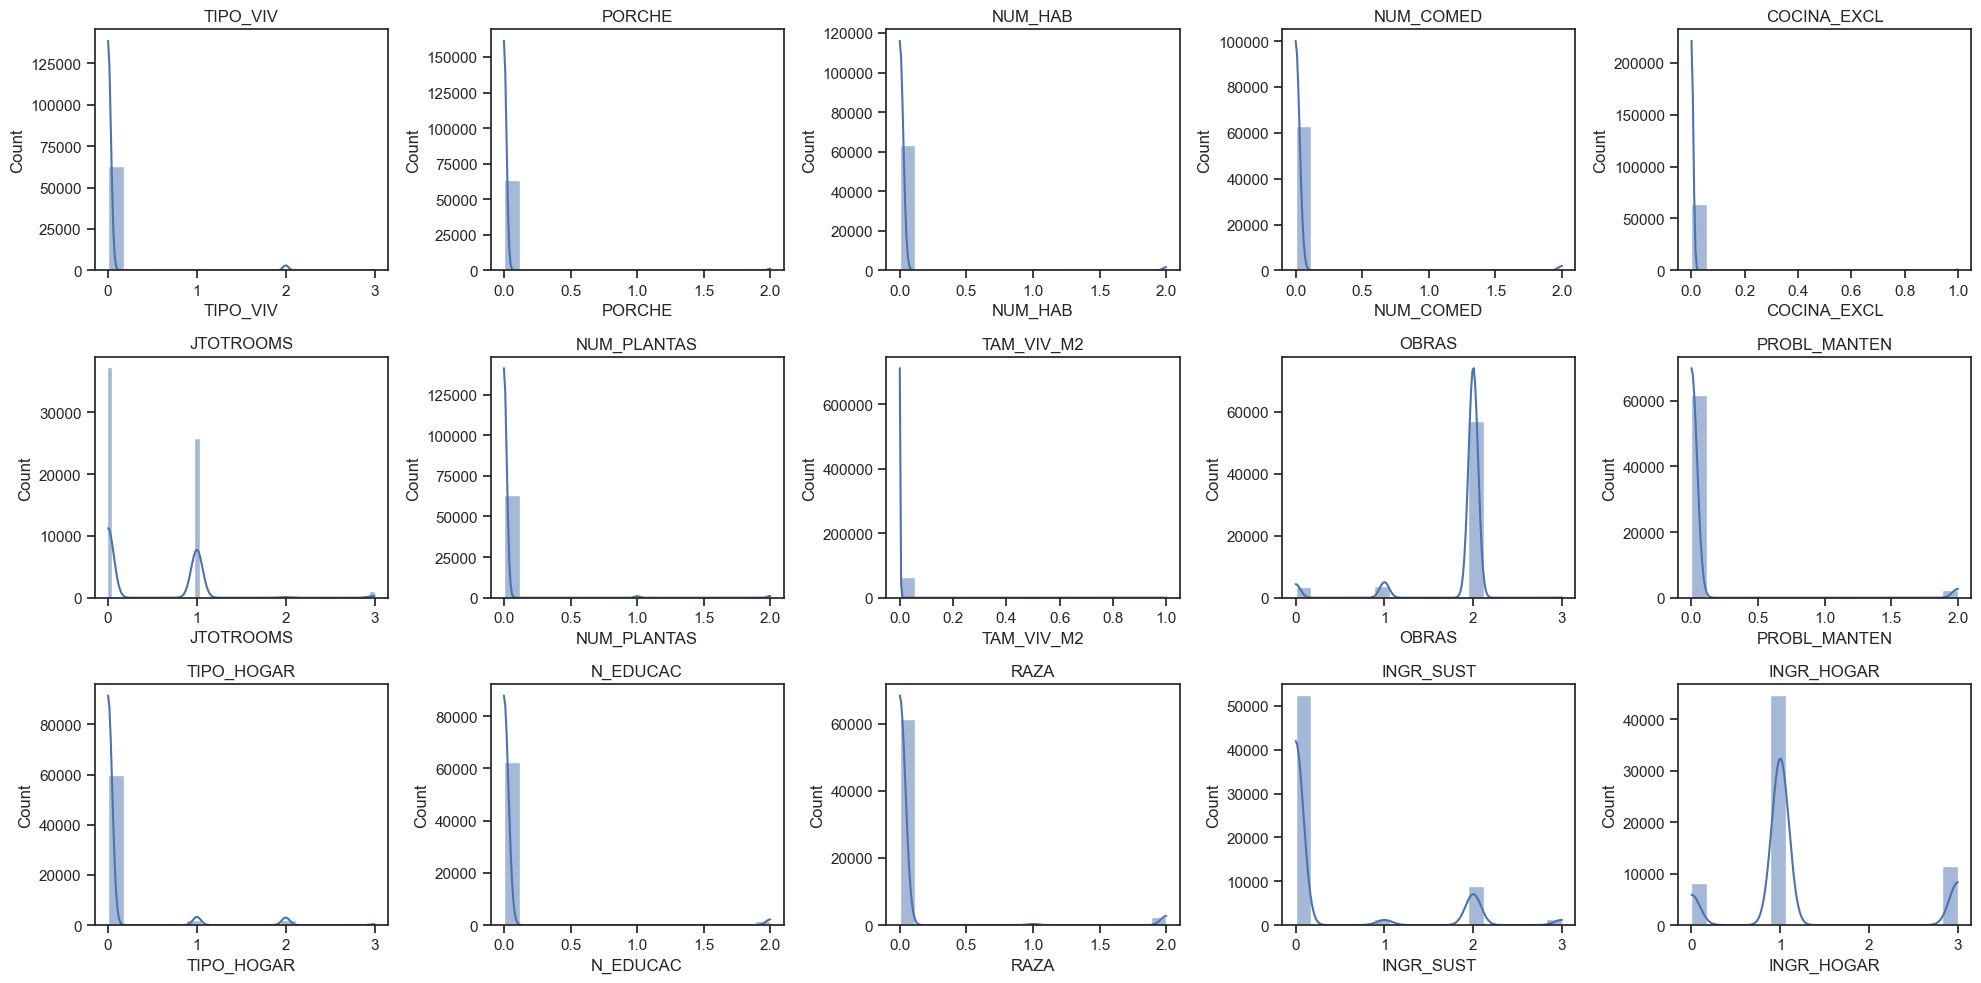

In [78]:
num_rows = 3
num_cols = 5
variable_names = list(df2022.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=df2022[var_name], ax=ax, kde=True)
    ax.set_title(var_name)
plt.tight_layout()
plt.show()

In [112]:
df2016.to_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/datos_2016.csv', index=False)
df2018.to_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/datos_2018.csv', index=False)
df2020.to_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/datos_2020.csv', index=False)
df2022.to_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/datos_2022.csv', index=False)

# Análisis del dato

In [3]:
df2016 = pd.read_csv("C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/datos_2016.csv",sep=",")
df2018 = pd.read_csv("C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/datos_2018.csv",sep=",")
df2020 = pd.read_csv("C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/datos_2020.csv",sep=",")
df2022 = pd.read_csv("C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/datos_2022.csv",sep=",")

### Matriz de correlación
A continuación, calcularemos la matriz de correlación para las 4 bases de datos correspondientes a 2016, 2018, 2020 y 2022 para poder determinar cuales son aquellas variables que tienen una mayor correlación con la varible "victimas_vio_gen".

                  TIPO_VIV    PORCHE   NUM_HAB  NUM_COMED  NUM_COCINAS  \
TIPO_VIV          1.000000  0.052546  0.025780   0.022613     0.030498   
PORCHE            0.052546  1.000000  0.395016   0.401692     0.425059   
NUM_HAB           0.025780  0.395016  1.000000   0.750045     0.797570   
NUM_COMED         0.022613  0.401692  0.750045   1.000000     0.770568   
NUM_COCINAS       0.030498  0.425059  0.797570   0.770568     1.000000   
COCINA_EXCL       0.370409  0.122953  0.147505   0.139166     0.147376   
JTOTROOMS        -0.078903  0.230820  0.472043   0.547819     0.438818   
NUM_PLANTAS       0.001966  0.302251  0.298968   0.286019     0.330555   
TAM_VIV_M2       -0.000680  0.047907 -0.000452  -0.000533    -0.000413   
OBRAS            -0.128707 -0.029051 -0.030250  -0.035911    -0.031952   
PROBL_MANTEN      0.014630  0.303558  0.464216   0.552717     0.447107   
TIPO_HOGAR        0.011837  0.008041  0.008986   0.005434     0.004523   
N_EDUCAC          0.037760 -0.011474 -

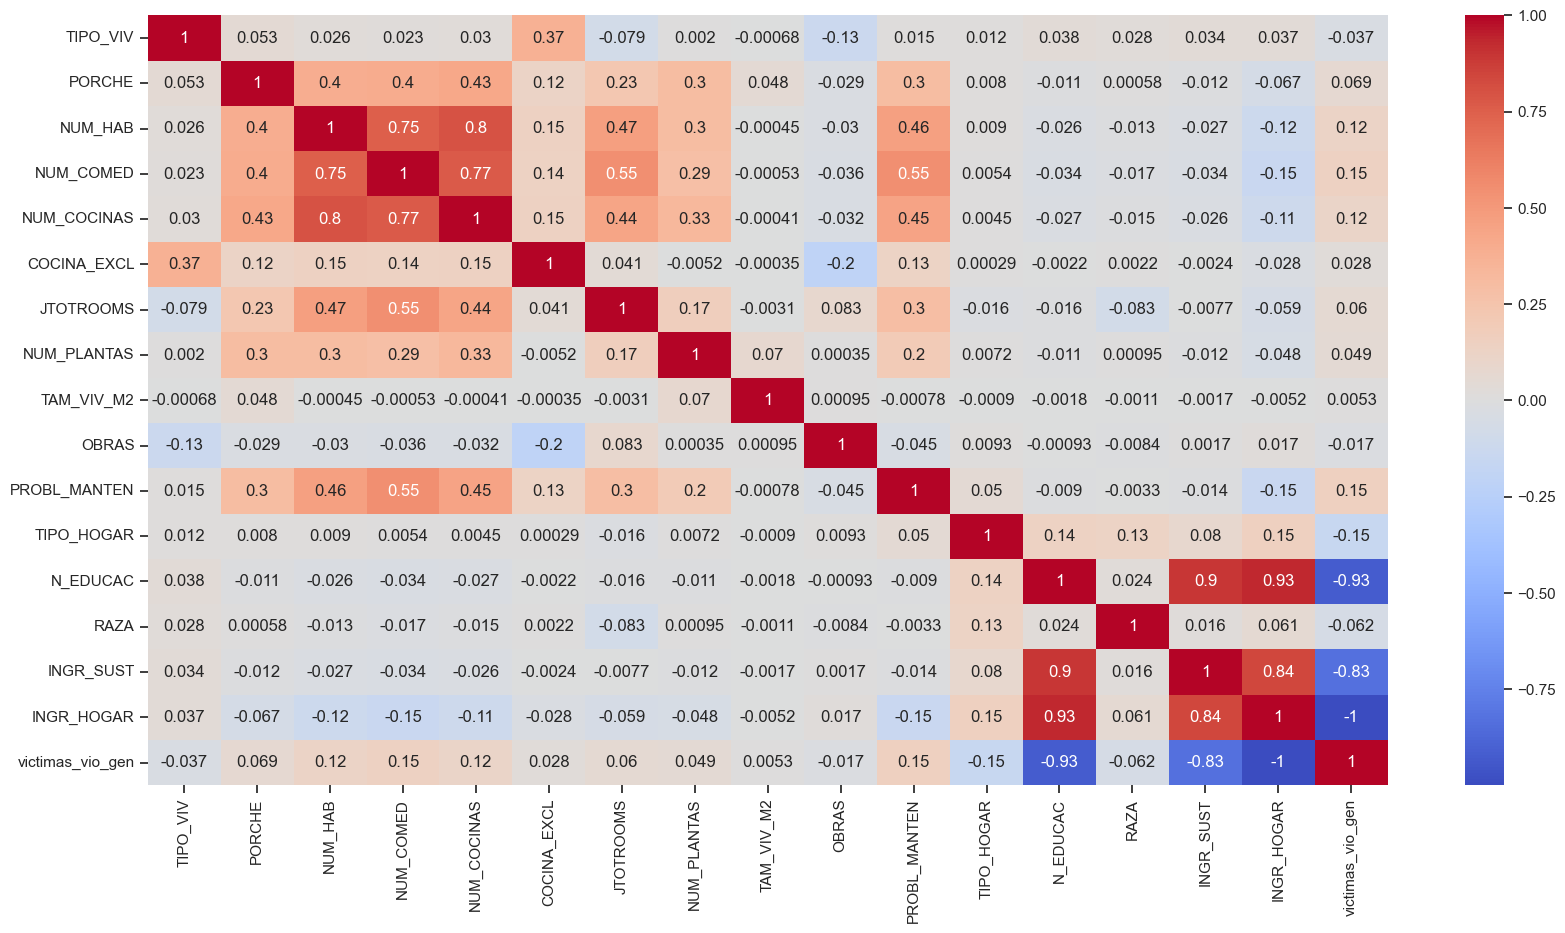

In [4]:
# 2016
# Calcular la matriz de correlación
matriz_corr = df2016.corr()
print(df2016.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2016.corr(), annot=True, cmap='coolwarm')
plt.show()

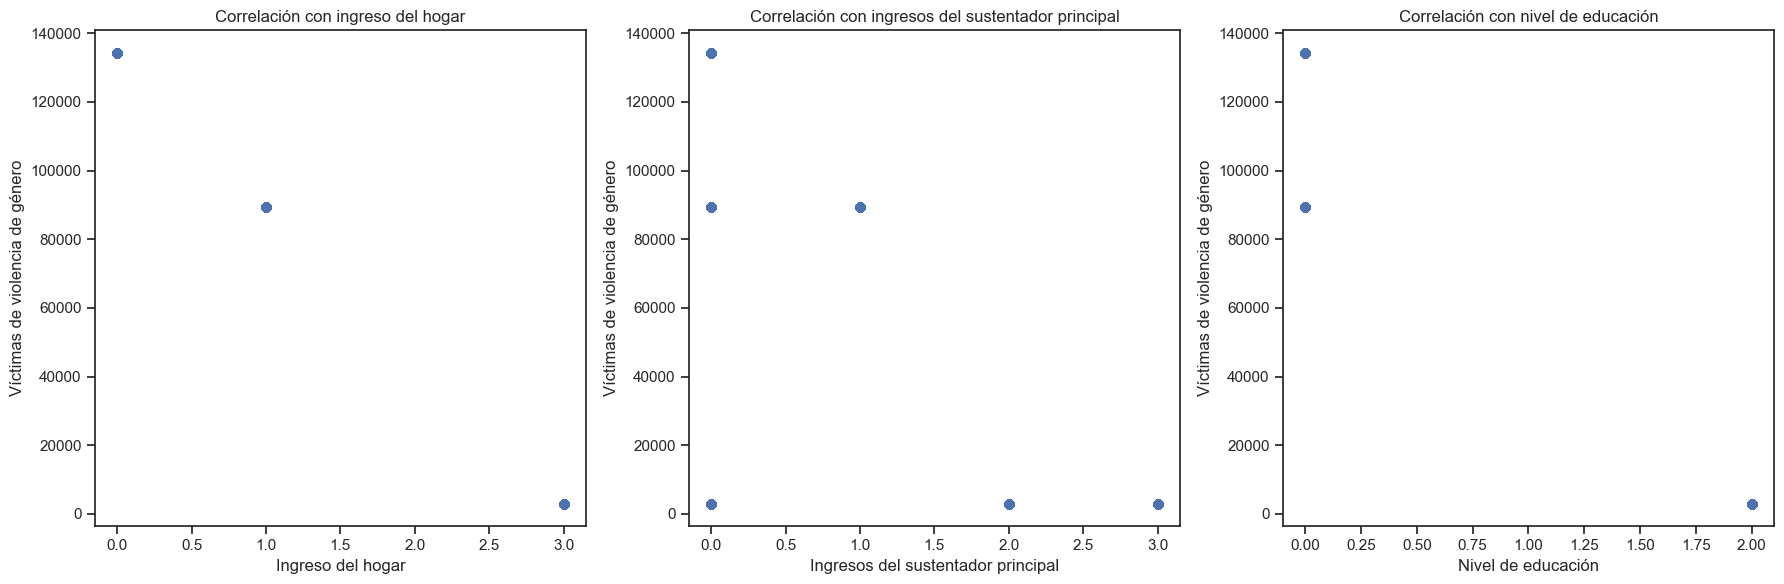

In [5]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para los tres gráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de dispersión para la correlación con INGR_HOGAR
axs[0].scatter(df2016['INGR_HOGAR'], df2016['victimas_vio_gen'])
axs[0].set_title('Correlación con ingreso del hogar')
axs[0].set_xlabel('Ingreso del hogar')
axs[0].set_ylabel('Víctimas de violencia de género')

# Gráfico de dispersión para la correlación con INGR_SUST
axs[1].scatter(df2016['INGR_SUST'], df2016['victimas_vio_gen'])
axs[1].set_title('Correlación con ingresos del sustentador principal')
axs[1].set_xlabel('Ingresos del sustentador principal')
axs[1].set_ylabel('Víctimas de violencia de género')

# Gráfico de dispersión para la correlación con N_EDUCAC
axs[2].scatter(df2016['N_EDUCAC'], df2016['victimas_vio_gen'])
axs[2].set_title('Correlación con nivel de educación')
axs[2].set_xlabel('Nivel de educación')
axs[2].set_ylabel('Víctimas de violencia de género')

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

In [6]:
from scipy.stats import pearsonr

# Calcular el valor p para la correlación entre "victimas de violencia de género" e "INGR_HOGAR"
corr_coef_ingresos, p_valor_ingresos = pearsonr(df2016['victimas_vio_gen'], df2016['INGR_HOGAR'])
print("Correlación con ingresos del hogar:")
print("Coeficiente de correlación:", corr_coef_ingresos)
print("Valor p:", format(p_valor_ingresos, '.5f'))


# Calcular el valor p para la correlación entre "victimas de violencia de género" y "INGR_SUST"
corr_coef_estudios, p_valor_estudios = pearsonr(df2016['victimas_vio_gen'], df2016['INGR_SUST'])
print("\nCorrelación con ingresos del sustentador principal:")
print("Coeficiente de correlación:", corr_coef_estudios)
print("Valor p:", format(p_valor_ingresos, '.5f'))

# Calcular el valor p para la correlación entre "victimas de violencia de género" y "N_EDUCAC"
corr_coef_estudios, p_valor_estudios = pearsonr(df2016['victimas_vio_gen'], df2016['N_EDUCAC'])
print("\nCorrelación con nivel de educación:")
print("Coeficiente de correlación:", corr_coef_estudios)
print("Valor p:", format(p_valor_ingresos, '.5f'))

Correlación con ingresos del hogar:
Coeficiente de correlación: -0.9999416247936737
Valor p: 0.00300

Correlación con ingresos del sustentador principal:
Coeficiente de correlación: -0.8346492053516028
Valor p: 0.00129

Correlación con nivel de educación:
Coeficiente de correlación: -0.9265914990984822
Valor p: 0.00897


                  TIPO_VIV    PORCHE  NUM_BANIOS   NUM_HAB  NUM_COMED  \
TIPO_VIV          1.000000  0.030212    0.015610  0.011996   0.009742   
PORCHE            0.030212  1.000000    0.310281  0.427169   0.420593   
NUM_BANIOS        0.015610  0.310281    1.000000  0.601727   0.565334   
NUM_HAB           0.011996  0.427169    0.601727  1.000000   0.760119   
NUM_COMED         0.009742  0.420593    0.565334  0.760119   1.000000   
COCINA_EXCL       0.270260  0.129911    0.107382  0.129497   0.131356   
JTOTROOMS        -0.089306  0.228612    0.265449  0.451224   0.526710   
NUM_PLANTAS       0.074742  0.326548    0.223594  0.292853   0.267355   
TAM_VIV_M2        0.002056  0.011564    0.076420  0.111656   0.093967   
OBRAS            -0.132731 -0.012036   -0.385657  0.009176  -0.019738   
PROBL_MANTEN      0.009522  0.307209    0.453907  0.472434   0.550307   
TIPO_HOGAR       -0.002075  0.008890   -0.046116 -0.006867  -0.007985   
N_EDUCAC          0.024659 -0.104217   -0.423369 -0

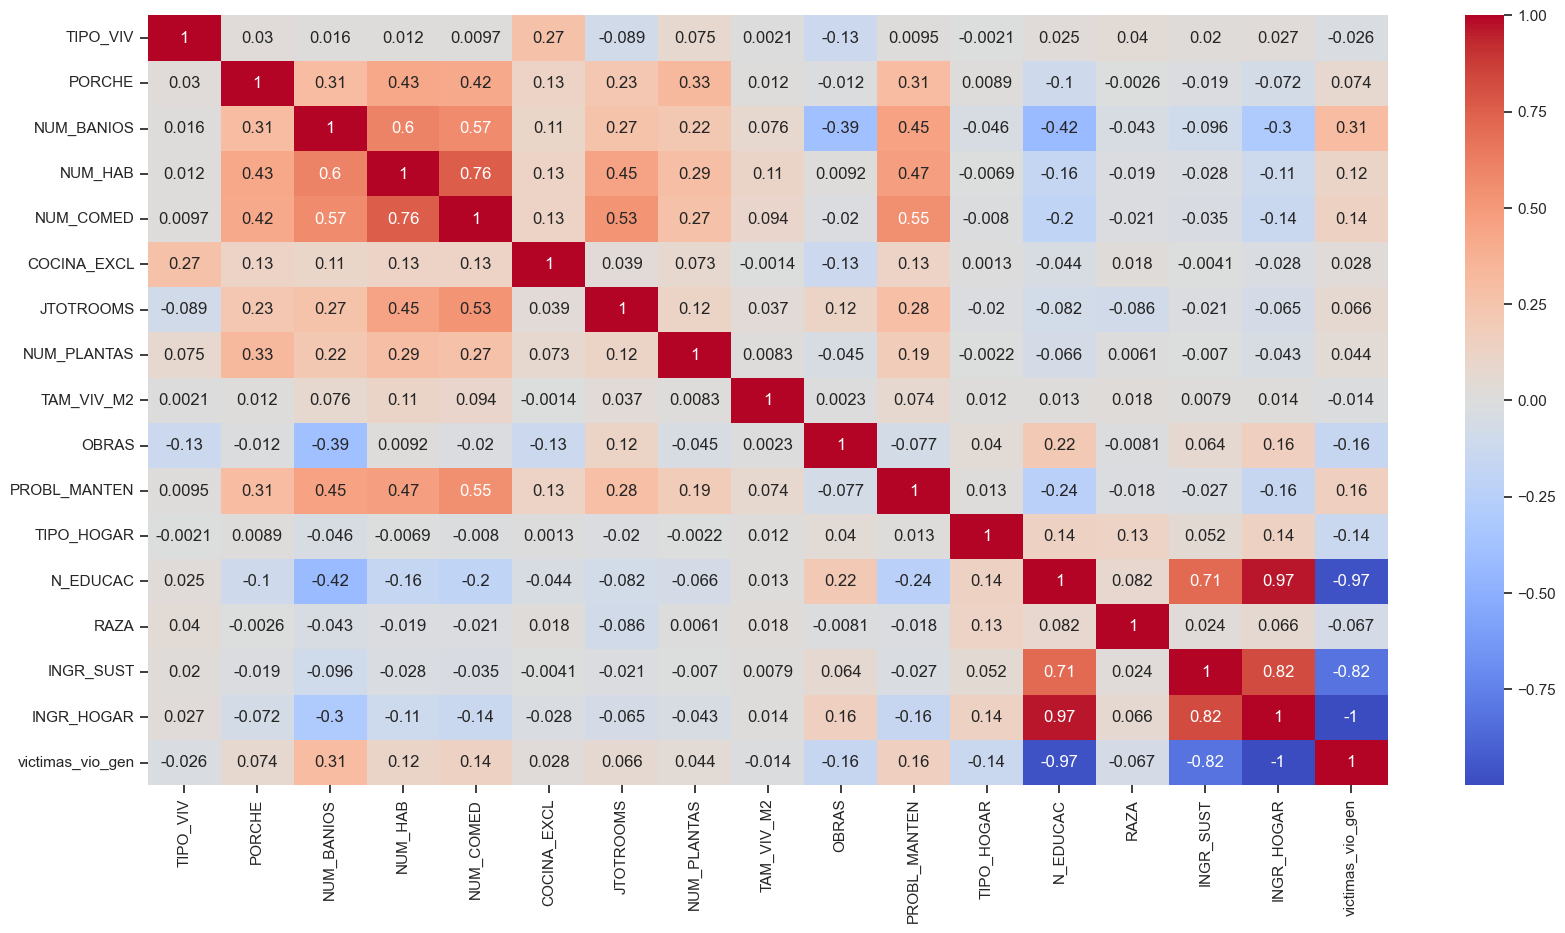

In [7]:
# 2018
# Calcular la matriz de correlación
matriz_corr = df2018.corr()
print(df2018.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2018.corr(), annot=True, cmap='coolwarm')
plt.show()

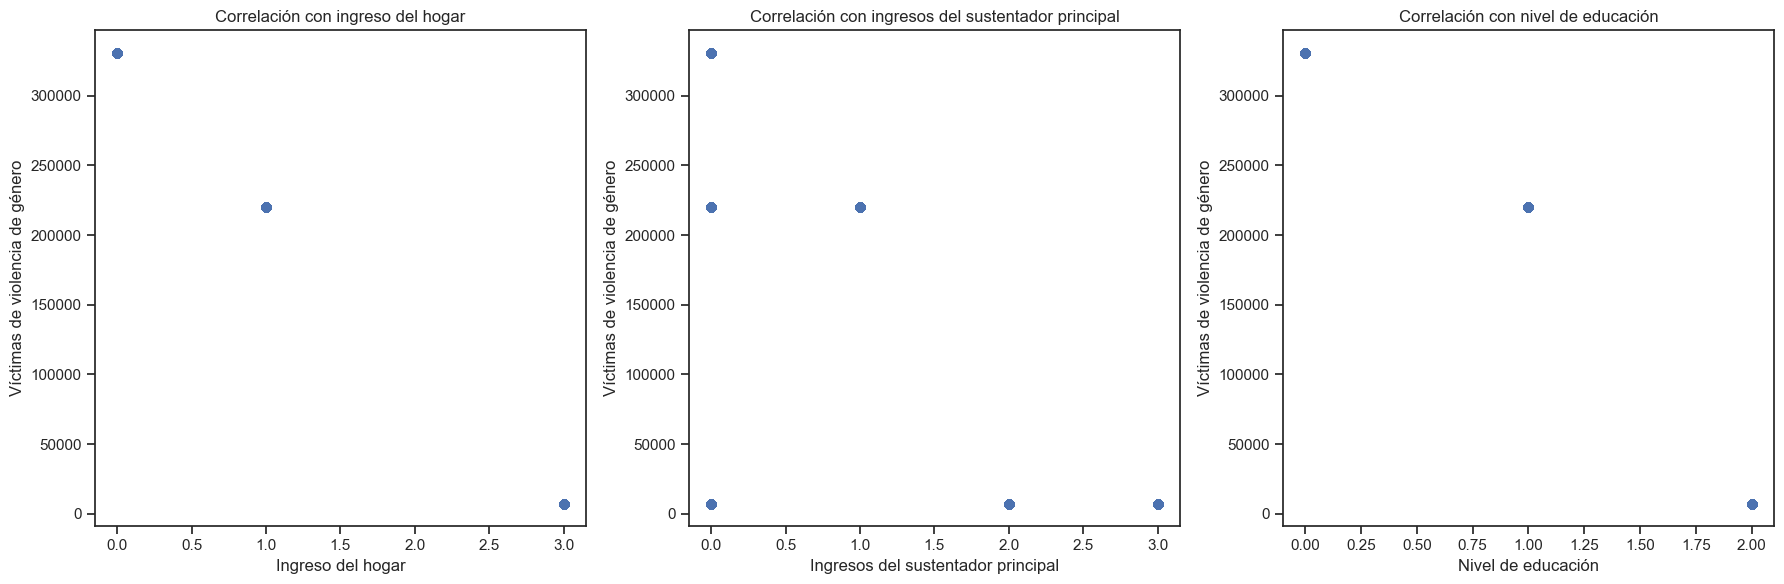

In [8]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para los tres gráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de dispersión para la correlación con INGR_HOGAR
axs[0].scatter(df2018['INGR_HOGAR'], df2018['victimas_vio_gen'])
axs[0].set_title('Correlación con ingreso del hogar')
axs[0].set_xlabel('Ingreso del hogar')
axs[0].set_ylabel('Víctimas de violencia de género')

# Gráfico de dispersión para la correlación con INGR_SUST
axs[1].scatter(df2018['INGR_SUST'], df2018['victimas_vio_gen'])
axs[1].set_title('Correlación con ingresos del sustentador principal')
axs[1].set_xlabel('Ingresos del sustentador principal')
axs[1].set_ylabel('Víctimas de violencia de género')

# Gráfico de dispersión para la correlación con N_EDUCAC
axs[2].scatter(df2018['N_EDUCAC'], df2018['victimas_vio_gen'])
axs[2].set_title('Correlación con nivel de educación')
axs[2].set_xlabel('Nivel de educación')
axs[2].set_ylabel('Víctimas de violencia de género')

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

In [9]:
from scipy.stats import pearsonr

# Calcular el valor p para la correlación entre "victimas de violencia de género" e "INGR_HOGAR"
corr_coef_ingresos, p_valor_ingresos = pearsonr(df2018['victimas_vio_gen'], df2018['INGR_HOGAR'])
print("Correlación con ingresos del hogar:")
print("Coeficiente de correlación:", corr_coef_ingresos)
print("Valor p:", format(p_valor_ingresos, '.5f'))


# Calcular el valor p para la correlación entre "victimas de violencia de género" y "INGR_SUST"
corr_coef_estudios, p_valor_estudios = pearsonr(df2018['victimas_vio_gen'], df2018['INGR_SUST'])
print("\nCorrelación con ingresos del sustentador principal:")
print("Coeficiente de correlación:", corr_coef_estudios)
print("Valor p:", format(p_valor_ingresos, '.5f'))

# Calcular el valor p para la correlación entre "victimas de violencia de género" y "N_EDUCAC"
corr_coef_estudios, p_valor_estudios = pearsonr(df2018['victimas_vio_gen'], df2018['N_EDUCAC'])
print("\nCorrelación con nivel de educación:")
print("Coeficiente de correlación:", corr_coef_estudios)
print("Valor p:", format(p_valor_ingresos, '.5f'))

Correlación con ingresos del hogar:
Coeficiente de correlación: -0.9999403646601648
Valor p: 0.00010

Correlación con ingresos del sustentador principal:
Coeficiente de correlación: -0.8182572005502022
Valor p: 0.00006

Correlación con nivel de educación:
Coeficiente de correlación: -0.9692869671613406
Valor p: 0.00027


                  TIPO_VIV    PORCHE   NUM_HAB  NUM_COMED  COCINA_EXCL  \
TIPO_VIV          1.000000  0.025903  0.009671   0.003833     0.259097   
PORCHE            0.025903  1.000000  0.477938   0.441359     0.118627   
NUM_HAB           0.009671  0.477938  1.000000   0.767119     0.150850   
NUM_COMED         0.003833  0.441359  0.767119   1.000000     0.148582   
COCINA_EXCL       0.259097  0.118627  0.150850   0.148582     1.000000   
JTOTROOMS        -0.101992  0.256202  0.479937   0.558772     0.062434   
NUM_PLANTAS       0.147282  0.377968  0.372214   0.331170     0.123736   
TAM_VIV_M2       -0.004599  0.017977  0.004602   0.003115    -0.001682   
OBRAS            -0.126658 -0.006179 -0.009487  -0.011619    -0.163716   
PROBL_MANTEN     -0.000986  0.321810  0.454954   0.521158     0.157981   
TIPO_HOGAR        0.002191  0.004889 -0.012087  -0.013867     0.002865   
N_EDUCAC          0.025182 -0.019355 -0.042392  -0.051607    -0.004840   
RAZA              0.029304  0.002315 -

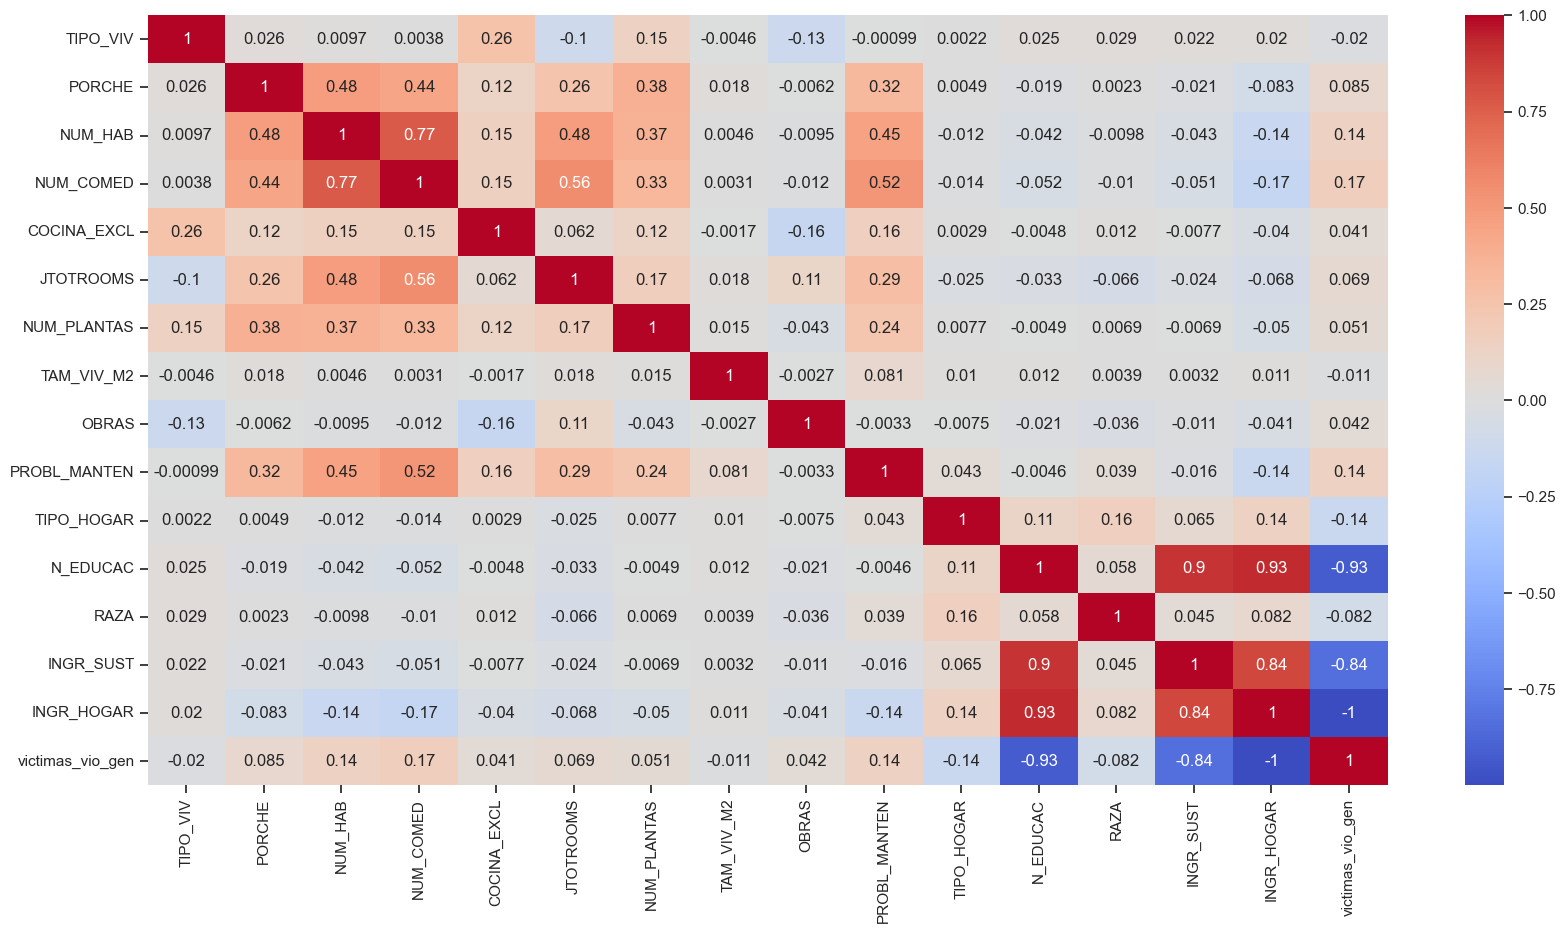

In [10]:
# 2020
# Calcular la matriz de correlación
matriz_corr = df2020.corr()
print(df2020.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2020.corr(), annot=True, cmap='coolwarm')
plt.show()

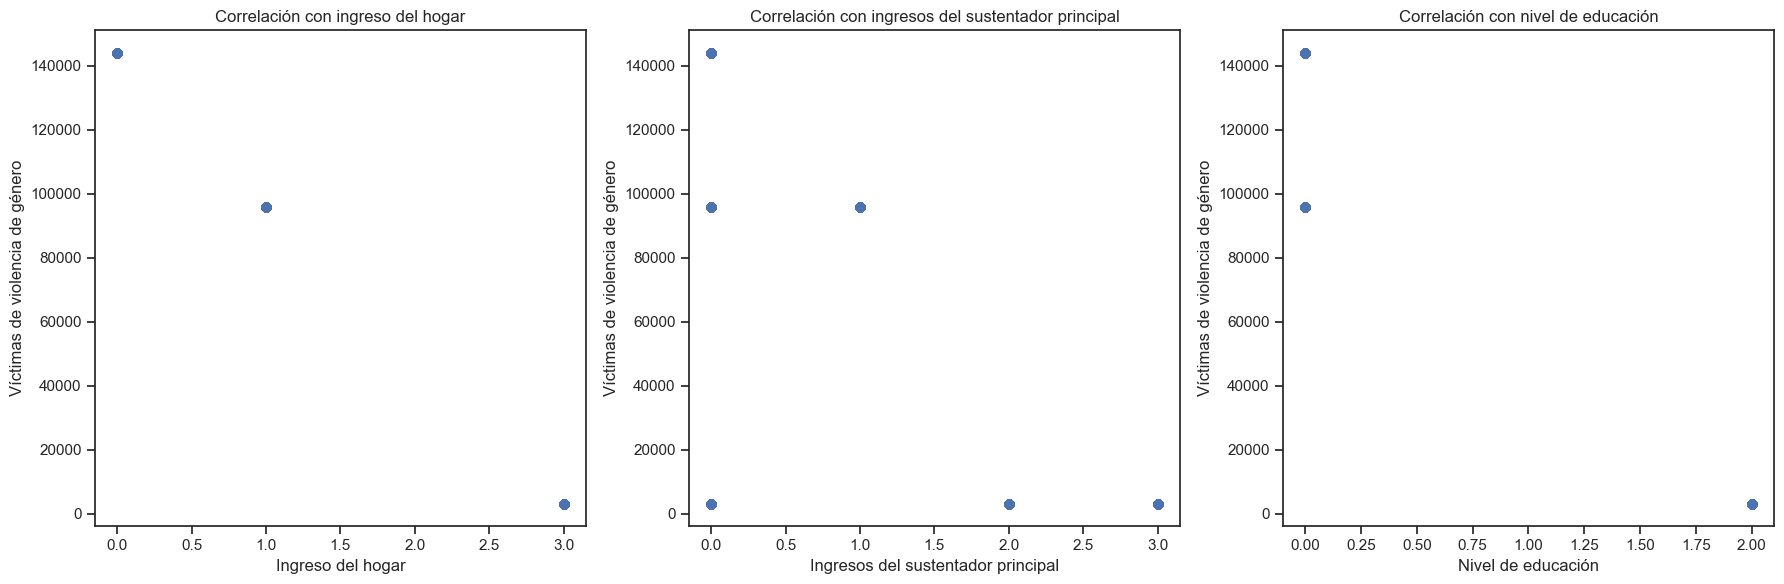

In [11]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para los tres gráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de dispersión para la correlación con INGR_HOGAR
axs[0].scatter(df2020['INGR_HOGAR'], df2020['victimas_vio_gen'])
axs[0].set_title('Correlación con ingreso del hogar')
axs[0].set_xlabel('Ingreso del hogar')
axs[0].set_ylabel('Víctimas de violencia de género')

# Gráfico de dispersión para la correlación con INGR_SUST
axs[1].scatter(df2020['INGR_SUST'], df2020['victimas_vio_gen'])
axs[1].set_title('Correlación con ingresos del sustentador principal')
axs[1].set_xlabel('Ingresos del sustentador principal')
axs[1].set_ylabel('Víctimas de violencia de género')

# Gráfico de dispersión para la correlación con N_EDUCAC
axs[2].scatter(df2020['N_EDUCAC'], df2020['victimas_vio_gen'])
axs[2].set_title('Correlación con nivel de educación')
axs[2].set_xlabel('Nivel de educación')
axs[2].set_ylabel('Víctimas de violencia de género')

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

In [12]:
from scipy.stats import pearsonr

# Calcular el valor p para la correlación entre "victimas de violencia de género" e "INGR_HOGAR"
corr_coef_ingresos, p_valor_ingresos = pearsonr(df2020['victimas_vio_gen'], df2020['INGR_HOGAR'])
print("Correlación con ingresos del hogar:")
print("Coeficiente de correlación:", corr_coef_ingresos)
print("Valor p:", format(p_valor_ingresos, '.5f'))


# Calcular el valor p para la correlación entre "victimas de violencia de género" y "INGR_SUST"
corr_coef_estudios, p_valor_estudios = pearsonr(df2020['victimas_vio_gen'], df2020['INGR_SUST'])
print("\nCorrelación con ingresos del sustentador principal:")
print("Coeficiente de correlación:", corr_coef_estudios)
print("Valor p:", format(p_valor_ingresos, '.5f'))

# Calcular el valor p para la correlación entre "victimas de violencia de género" y "N_EDUCAC"
corr_coef_estudios, p_valor_estudios = pearsonr(df2020['victimas_vio_gen'], df2020['N_EDUCAC'])
print("\nCorrelación con nivel de educación:")
print("Coeficiente de correlación:", corr_coef_estudios)
print("Valor p:", format(p_valor_ingresos, '.5f'))

Correlación con ingresos del hogar:
Coeficiente de correlación: -0.9999413016722145
Valor p: 0.00005

Correlación con ingresos del sustentador principal:
Coeficiente de correlación: -0.8397914003954593
Valor p: 0.00710

Correlación con nivel de educación:
Coeficiente de correlación: -0.9251065617917619
Valor p: 0.00107


                  TIPO_VIV    PORCHE   NUM_HAB  NUM_COMED  COCINA_EXCL  \
TIPO_VIV          1.000000  0.063563  0.056237   0.046304     0.103540   
PORCHE            0.063563  1.000000  0.442567   0.433705     0.237760   
NUM_HAB           0.056237  0.442567  1.000000   0.784589     0.284518   
NUM_COMED         0.046304  0.433705  0.784589   1.000000     0.276032   
COCINA_EXCL       0.103540  0.237760  0.284518   0.276032     1.000000   
JTOTROOMS        -0.042029  0.248885  0.481379   0.546530     0.150082   
NUM_PLANTAS       0.102488  0.347159  0.367504   0.340943     0.165357   
TAM_VIV_M2        0.008162  0.007861  0.004591   0.003307    -0.001205   
OBRAS            -0.090914 -0.022858 -0.016075  -0.020453    -0.105830   
PROBL_MANTEN      0.041920  0.329823  0.501800   0.561468     0.270140   
TIPO_HOGAR        0.005492 -0.001674 -0.015750  -0.013286    -0.007818   
N_EDUCAC          0.022665 -0.127955 -0.209070  -0.236796    -0.109230   
RAZA              0.023693 -0.001904 -

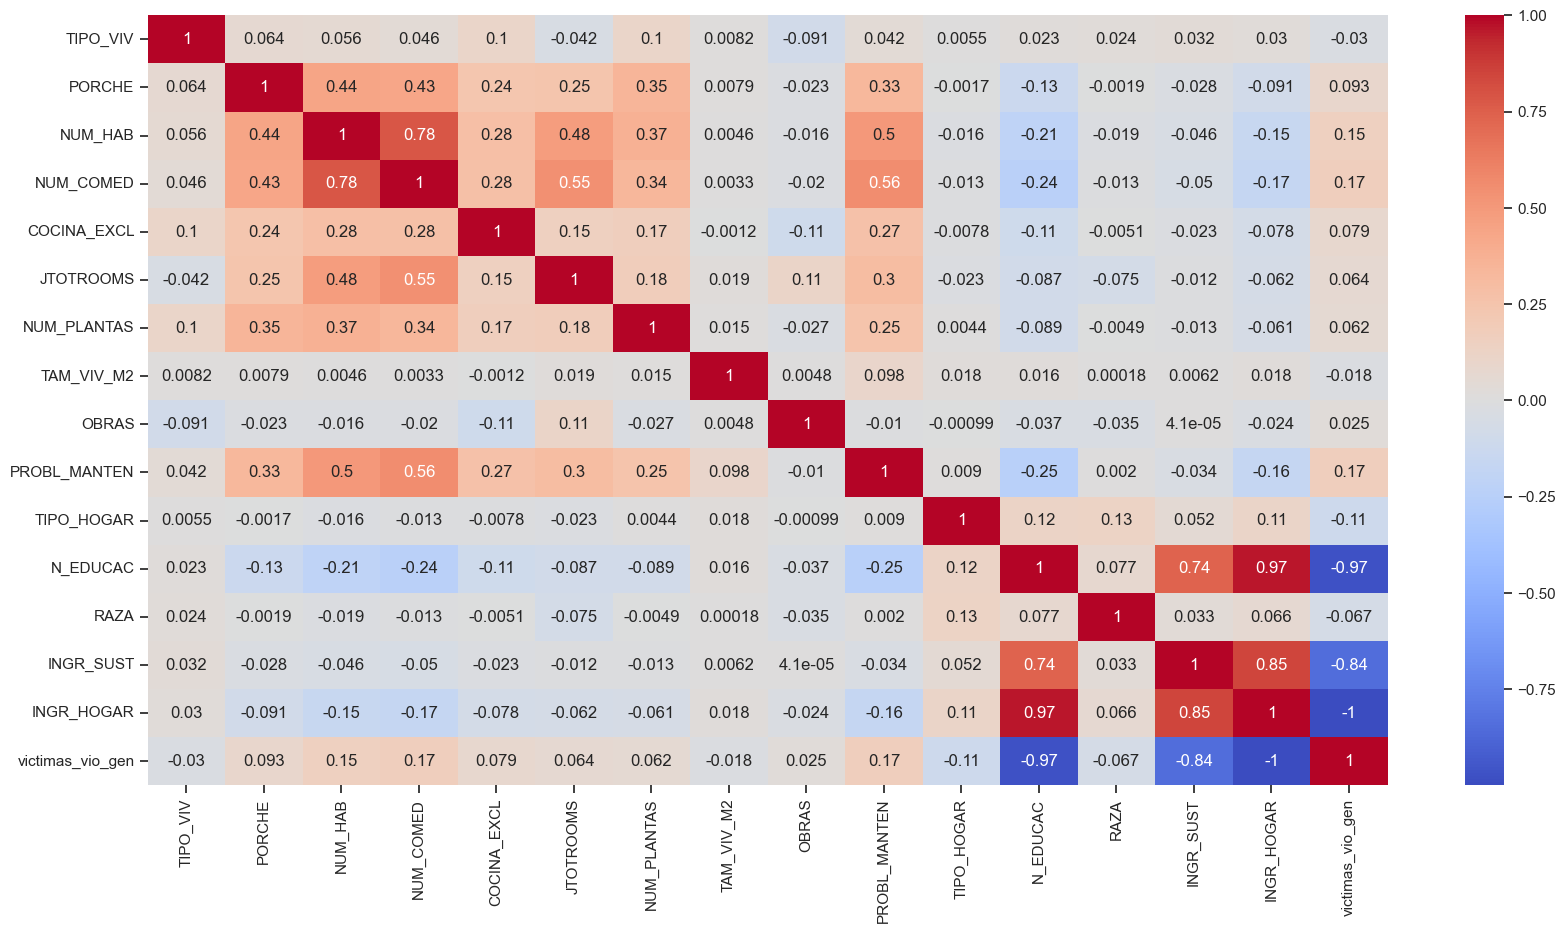

In [13]:
# 2022
# Calcular la matriz de correlación
matriz_corr = df2022.corr()
print(df2022.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2022.corr(), annot=True, cmap='coolwarm')
plt.show()

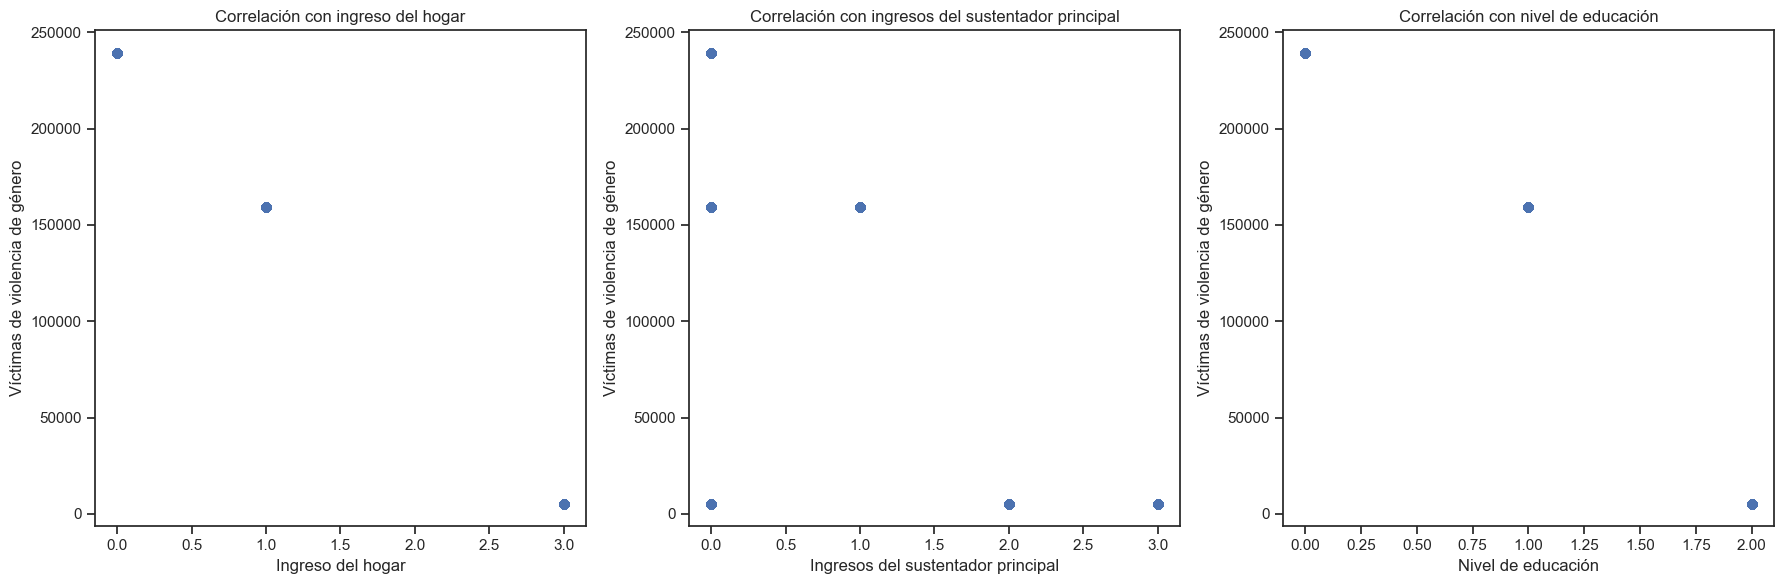

In [14]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para los tres gráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de dispersión para la correlación con INGR_HOGAR
axs[0].scatter(df2022['INGR_HOGAR'], df2022['victimas_vio_gen'])
axs[0].set_title('Correlación con ingreso del hogar')
axs[0].set_xlabel('Ingreso del hogar')
axs[0].set_ylabel('Víctimas de violencia de género')

# Gráfico de dispersión para la correlación con INGR_SUST
axs[1].scatter(df2022['INGR_SUST'], df2022['victimas_vio_gen'])
axs[1].set_title('Correlación con ingresos del sustentador principal')
axs[1].set_xlabel('Ingresos del sustentador principal')
axs[1].set_ylabel('Víctimas de violencia de género')

# Gráfico de dispersión para la correlación con N_EDUCAC
axs[2].scatter(df2022['N_EDUCAC'], df2022['victimas_vio_gen'])
axs[2].set_title('Correlación con nivel de educación')
axs[2].set_xlabel('Nivel de educación')
axs[2].set_ylabel('Víctimas de violencia de género')

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

In [15]:
from scipy.stats import pearsonr

# Calcular el valor p para la correlación entre "victimas de violencia de género" e "INGR_HOGAR"
corr_coef_ingresos, p_valor_ingresos = pearsonr(df2022['victimas_vio_gen'], df2022['INGR_HOGAR'])
print("Correlación con ingresos del hogar:")
print("Coeficiente de correlación:", corr_coef_ingresos)
print("Valor p:", format(p_valor_ingresos, '.5f'))


# Calcular el valor p para la correlación entre "victimas de violencia de género" y "INGR_SUST"
corr_coef_estudios, p_valor_estudios = pearsonr(df2022['victimas_vio_gen'], df2022['INGR_SUST'])
print("\nCorrelación con ingresos del sustentador principal:")
print("Coeficiente de correlación:", corr_coef_estudios)
print("Valor p:", format(p_valor_ingresos, '.5f'))

# Calcular el valor p para la correlación entre "victimas de violencia de género" y "N_EDUCAC"
corr_coef_estudios, p_valor_estudios = pearsonr(df2022['victimas_vio_gen'], df2022['N_EDUCAC'])
print("\nCorrelación con nivel de educación:")
print("Coeficiente de correlación:", corr_coef_estudios)
print("Valor p:", format(p_valor_ingresos, '.5f'))

Correlación con ingresos del hogar:
Coeficiente de correlación: -0.999940638218249
Valor p: 0.00555

Correlación con ingresos del sustentador principal:
Coeficiente de correlación: -0.8436986314358568
Valor p: 0.00100

Correlación con nivel de educación:
Coeficiente de correlación: -0.9692119974733419
Valor p: 0.00910


Como hemos visto, en los 4 años, las variables que tienen mayor correlación con "victimas_vio_gen" coinciden, por lo que nos quedaremos con estas 3 variables en las 4 bases de datos: INGR_HOGAR, N_EDUCAC, INGR_SUST.

In [16]:
#Eliminamos aquellas variables que no tienen correlación
df2016 = df2016.drop(["TIPO_VIV", "PORCHE", "NUM_HAB", "NUM_COMED", "COCINA_EXCL", "JTOTROOMS", "NUM_PLANTAS", "TAM_VIV_M2", "OBRAS", "PROBL_MANTEN", "TIPO_HOGAR", "RAZA", "NUM_COCINAS"], axis=1)
df2018 = df2018.drop(["TIPO_VIV", "PORCHE", "NUM_HAB", "NUM_COMED", "COCINA_EXCL", "JTOTROOMS", "NUM_PLANTAS", "TAM_VIV_M2", "OBRAS", "PROBL_MANTEN", "TIPO_HOGAR", "RAZA", "NUM_BANIOS"], axis=1)
df2020 = df2020.drop(["TIPO_VIV", "PORCHE", "NUM_HAB", "NUM_COMED", "COCINA_EXCL", "JTOTROOMS", "NUM_PLANTAS", "TAM_VIV_M2", "OBRAS", "PROBL_MANTEN", "TIPO_HOGAR", "RAZA"], axis=1)
df2022 = df2022.drop(["TIPO_VIV", "PORCHE", "NUM_HAB", "NUM_COMED", "COCINA_EXCL", "JTOTROOMS", "NUM_PLANTAS", "TAM_VIV_M2", "OBRAS", "PROBL_MANTEN", "TIPO_HOGAR", "RAZA"], axis=1)

In [17]:
victimas_2016 = df2016['victimas_vio_gen']
df2016.drop('victimas_vio_gen', axis=1, inplace=True)
victimas_2018 = df2018['victimas_vio_gen']
df2018.drop('victimas_vio_gen', axis=1, inplace=True)
victimas_2020 = df2020['victimas_vio_gen']
df2020.drop('victimas_vio_gen', axis=1, inplace=True)
victimas_2022 = df2022['victimas_vio_gen']
df2022.drop('victimas_vio_gen', axis=1, inplace=True)

### Método del codo
A continuación, emplearemos el método del codo para determinar el número de clústeres. Cada clúster se corresponderá con un nivel de clase social.

C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\clust

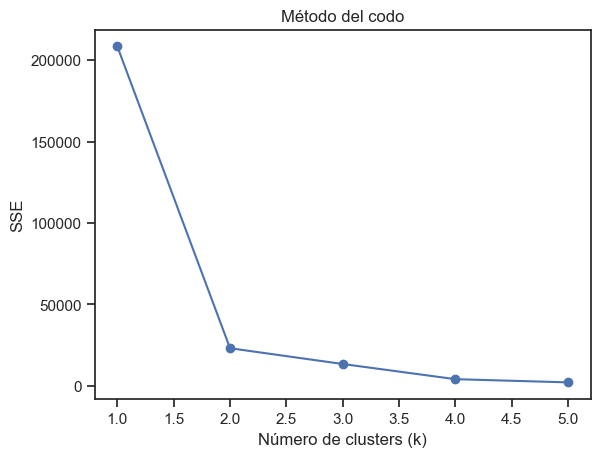

In [18]:
#2016
scaler = StandardScaler()
data_scaled_2016 = scaler.fit_transform(df2016)
inertia = []
k_values = list(range(1, 6))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_2016)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\clust

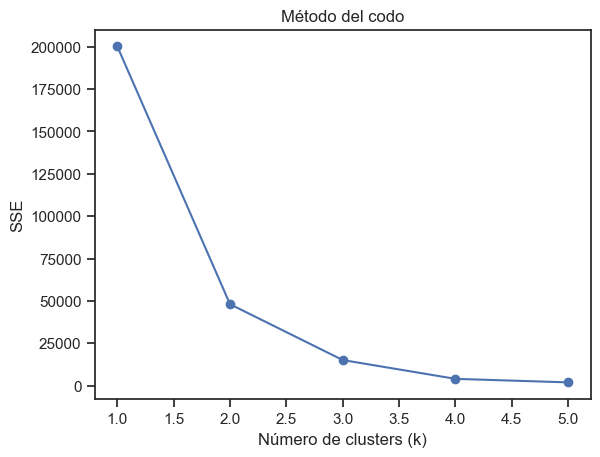

In [19]:
#2018
scaler = StandardScaler()
data_scaled_2018 = scaler.fit_transform(df2018)
inertia = []
k_values = list(range(1, 6))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_2018)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\clust

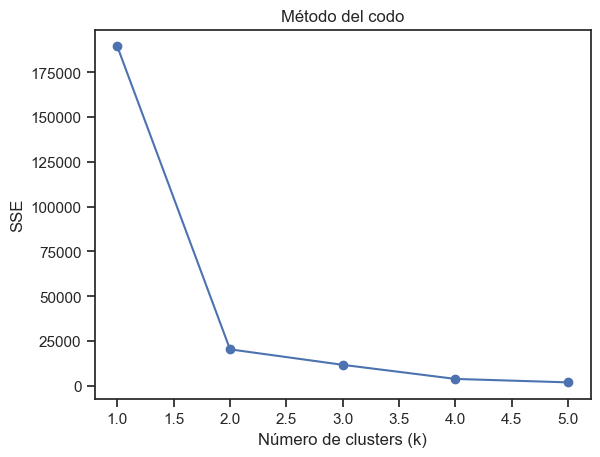

In [20]:
#2020
scaler = StandardScaler()
data_scaled_2020 = scaler.fit_transform(df2020)
inertia = []
k_values = list(range(1, 6))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_2020)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\clust

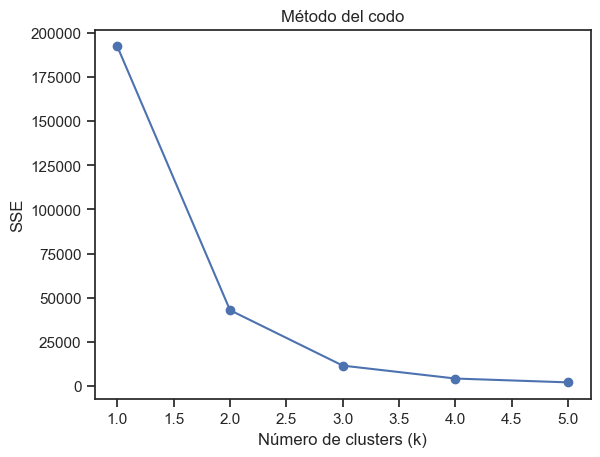

In [21]:
#2022
scaler = StandardScaler()
data_scaled_2022 = scaler.fit_transform(df2022)
inertia = []
k_values = list(range(1, 6))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_2022)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

### K-modes
Ahora emplearemos K-modes para la clusterización de nuestros datos. Una vez se hayan dividido nuestros datos por clústeres, no sabremos qué clúster pertenece a qué clase social, sim embargo, para ello emplearemos la media de la varible INGR_HOGAR. De esta manera, el clúster que mayor media de INGR_HOGAR tenga, será el clúster de un nivel social mayor, y así sucesivamente.

Repetiremos el proceso para las 4 bases de datos.

#### 2016

In [22]:
k = 3 
kmodes_instance = KModes(n_clusters=k, init='Huang', n_init=10, verbose=1)
kmodes_clusters_2016 = kmodes_instance.fit_predict(df2016)
df2016_clustered = df2016.copy()
df2016_clustered['cluster'] = kmodes_clusters_2016
#Contamos el número de casos en cada nivel de clase social
df2016_clustered['cluster'].value_counts()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 12022.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 12022.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 12022.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 12022.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 11797.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 12022.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 4345.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 

1    47574
2    12903
0     9016
Name: cluster, dtype: int64

In [23]:
#Determinamos qué cluster representa cada clase social observando la media de ING_HOGAR
mean_income = df2016_clustered.groupby('cluster')['INGR_HOGAR'].mean()
print(mean_income)
#Aquí dado que los datos están codificados, nos salen unos valores de INGR_HOGAR muy bajos. Lo valores están entre 0 y 3, cuanto más cercano a 0 menor ingreso y cuanto más cercano a 3 mayor ingreso.

cluster
0    0.0
1    1.0
2    3.0
Name: INGR_HOGAR, dtype: float64


In [24]:
df2016_clustered['cluster'] = df2016_clustered['cluster'].replace({0:1, 1:2, 2:3})
df2016_clustered['cluster'].value_counts()

2    47574
3    12903
1     9016
Name: cluster, dtype: int64

In [25]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Silhouette Score
silhouette_avg = silhouette_score(data_scaled_2016, kmodes_clusters_2016)
# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(data_scaled_2016, kmodes_clusters_2016)
# Calcular el índice de Davies-Bouldin
db_score = davies_bouldin_score(data_scaled_2016, kmodes_clusters_2016)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Índice de Davies-Bouldin:", db_score)

Silhouette Score: 0.9286299758158822
Calinski-Harabasz Score: 494539.0199261295
Índice de Davies-Bouldin: 0.14232923020489022


#### 2018

In [26]:
k = 3 
kmodes_instance = KModes(n_clusters=k, init='Huang', n_init=10, verbose=1)
kmodes_clusters_2018 = kmodes_instance.fit_predict(df2018)
df2018_clustered = df2018.copy()
df2018_clustered['cluster'] = kmodes_clusters_2018
#Contamos el número de casos en cada nivel de clase social
df2018_clustered['cluster'].value_counts()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4398.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 4398.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 4398.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 20648.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 4398.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 4398.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 4398.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100

0    45892
2    12077
1     8783
Name: cluster, dtype: int64

In [27]:
#Determinamos qué cluster representa cada clase social observando la media de ING_HOGAR
mean_income = df2018_clustered.groupby('cluster')['INGR_HOGAR'].mean()
print(mean_income)
#Aquí dado que los datos están codificados, nos salen unos valores de INGR_HOGAR muy bajos. Lo valores están entre 0 y 3, cuanto más cercano a 0 menor ingreso y cuanto más cercano a 3 mayor ingreso.

cluster
0    1.0
1    0.0
2    3.0
Name: INGR_HOGAR, dtype: float64


In [28]:
df2018_clustered['cluster'] = df2018_clustered['cluster'].replace({0:3, 1:2, 2:1})
df2018_clustered['cluster'].value_counts()

3    45892
1    12077
2     8783
Name: cluster, dtype: int64

In [29]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Silhouette Score
silhouette_avg = silhouette_score(data_scaled_2018, kmodes_clusters_2018)
# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(data_scaled_2018, kmodes_clusters_2018)
# Calcular el índice de Davies-Bouldin
db_score = davies_bouldin_score(data_scaled_2018, kmodes_clusters_2018)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Índice de Davies-Bouldin:", db_score)

Silhouette Score: 0.9329010996837908
Calinski-Harabasz Score: 410926.6059424659
Índice de Davies-Bouldin: 0.17778218865410755


#### 2020

In [30]:
k = 3 
kmodes_instance = KModes(n_clusters=k, init='Huang', n_init=10, verbose=1)
kmodes_clusters_2020 = kmodes_instance.fit_predict(df2020)
df2020_clustered = df2020.copy()
df2020_clustered['cluster'] = kmodes_clusters_2020
#Contamos el número de casos en cada nivel de clase social
df2020_clustered['cluster'].value_counts()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4121.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 11361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 11541.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 11541.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2616, cost: 4121.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 2616, cost: 4121.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 11361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iterati

0    42440
2    12000
1     8745
Name: cluster, dtype: int64

In [31]:
#Determinamos qué cluster representa cada clase social observando la media de ING_HOGAR
mean_income = df2020_clustered.groupby('cluster')['INGR_HOGAR'].mean()
print(mean_income)
#Aquí dado que los datos están codificados, nos salen unos valores de INGR_HOGAR muy bajos. Lo valores están entre 0 y 3, cuanto más cercano a 0 menor ingreso y cuanto más cercano a 3 mayor ingreso.

cluster
0    1.0
1    0.0
2    3.0
Name: INGR_HOGAR, dtype: float64


In [32]:
df2020_clustered['cluster'] = df2020_clustered['cluster'].replace({0:2, 1:3, 2:1})
df2020_clustered['cluster'].value_counts()

2    42440
1    12000
3     8745
Name: cluster, dtype: int64

In [33]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Silhouette Score
silhouette_avg = silhouette_score(data_scaled_2020, kmodes_clusters_2020)
# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(data_scaled_2020, kmodes_clusters_2020)
# Calcular el índice de Davies-Bouldin
db_score = davies_bouldin_score(data_scaled_2020, kmodes_clusters_2020)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Índice de Davies-Bouldin:", db_score)

Silhouette Score: 0.9268729826472949
Calinski-Harabasz Score: 479680.0283894722
Índice de Davies-Bouldin: 0.12955775452072218


#### 2022

In [34]:
k = 3 
kmodes_instance = KModes(n_clusters=k, init='Huang', n_init=10, verbose=1)
kmodes_clusters_2022 = kmodes_instance.fit_predict(df2022)
df2022_clustered = df2022.copy()
df2022_clustered['cluster'] = kmodes_clusters_2022
#Contamos el número de casos en cada nivel de clase social
df2022_clustered['cluster'].value_counts()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4073.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 4073.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 4073.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 4073.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2593, cost: 4073.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 4073.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 4073.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/1

0    44598
1    11444
2     8099
Name: cluster, dtype: int64

In [35]:
#Determinamos qué cluster representa cada clase social observando la media de ING_HOGAR
mean_income = df2022_clustered.groupby('cluster')['INGR_HOGAR'].mean()
print(mean_income)
#Aquí dado que los datos están codificados, nos salen unos valores de INGR_HOGAR muy bajos. Lo valores están entre 0 y 3, cuanto más cercano a 0 menor ingreso y cuanto más cercano a 3 mayor ingreso.

cluster
0    1.0
1    3.0
2    0.0
Name: INGR_HOGAR, dtype: float64


In [36]:
df2022_clustered['cluster'] = df2022_clustered['cluster'].replace({0:2, 1:1, 2:3})
df2022_clustered['cluster'].value_counts()

2    44598
1    11444
3     8099
Name: cluster, dtype: int64

In [37]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Silhouette Score
silhouette_avg = silhouette_score(data_scaled_2022, kmodes_clusters_2022)
# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(data_scaled_2022, kmodes_clusters_2022)
# Calcular el índice de Davies-Bouldin
db_score = davies_bouldin_score(data_scaled_2022, kmodes_clusters_2022)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Índice de Davies-Bouldin:", db_score)

Silhouette Score: 0.9401878925122478
Calinski-Harabasz Score: 506338.0494932034
Índice de Davies-Bouldin: 0.12858108555749528


Ahora unimos los 4 años en un mismo df.

In [38]:
df2016_clustered["Anio"] = 2016
df2018_clustered["Anio"] = 2018
df2020_clustered["Anio"] = 2020
df2022_clustered["Anio"] = 2022
datos_todos_anios = pd.concat([df2016_clustered, df2018_clustered, df2020_clustered, df2022_clustered], ignore_index=True)
datos_todos_anios

N_EDUCAC  INGR_SUST  INGR_HOGAR  cluster  Anio
0              0          0           1        2  2016
1              0          0           1        2  2016
2              0          0           1        2  2016
3              0          1           1        2  2016
4              2          2           3        3  2016
...          ...        ...         ...      ...   ...
263566         0          0           0        3  2022
263567         1          0           1        2  2022
263568         0          0           0        3  2022
263569         1          0           1        2  2022
263570         1          0           1        2  2022

[263571 rows x 5 columns]

Ahora unimos todos los resultados en un mismo dataframe. Tendremos el número de personas de cada clase social por año en EE.UU.

In [39]:
eeuu = {
    "Anio": [2016, 2018, 2020, 2022],
    "Clase_Social_Alta": [12903, 10312, 12000, 11444],
    "Clase_Social_Media": [47574, 45892, 42440, 44598],
    "Clase_Social_Baja": [9016, 10548, 8745, 8099]
}
eeuu = pd.DataFrame(eeuu)
eeuu

Anio  Clase_Social_Alta  Clase_Social_Media  Clase_Social_Baja
0  2016              12903               47574               9016
1  2018              10312               45892              10548
2  2020              12000               42440               8745
3  2022              11444               44598               8099

In [40]:
#Los exportamos a un CSV
eeuu.to_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/eeuu.csv', index=False)

Ahora en un nuevo dataframe, pondremos las víctimas de violencia de género por año.

In [41]:
import pandas as pd

datos_vio_gen = {'Anio': [2016, 2018, 2020, 2022],
        'Victimas_Violencia_Genero': [298410, 734630, 319950, 531810]}
vic_violencia = pd.DataFrame(datos_vio_gen)
vic_violencia

Anio  Victimas_Violencia_Genero
0  2016                     298410
1  2018                     734630
2  2020                     319950
3  2022                     531810

Ahora unimos los dos dataframes anteriores en uno solo. De este modo, tendremos para cada año, el número de personas perteneciente a cada clase social y las víctimas de violencia de género en EE. UU.

In [44]:
datos_final = pd.merge(eeuu, vic_violencia, on="Anio")
datos_final

Anio  Clase_Social_Alta  Clase_Social_Media  Clase_Social_Baja  \
0  2016              12903               47574               9016   
1  2018              10312               45892              10548   
2  2020              12000               42440               8745   
3  2022              11444               44598               8099   

   Victimas_Violencia_Genero  
0                     298410  
1                     734630  
2                     319950  
3                     531810

In [45]:
#Guardamos este df en un csv
datos_final.to_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/datos_final_eeuu.csv', index=False)

Ahora estudiaremos los clústeres detenidamente para poder ver visualmente las principales diferencias entre ellos.

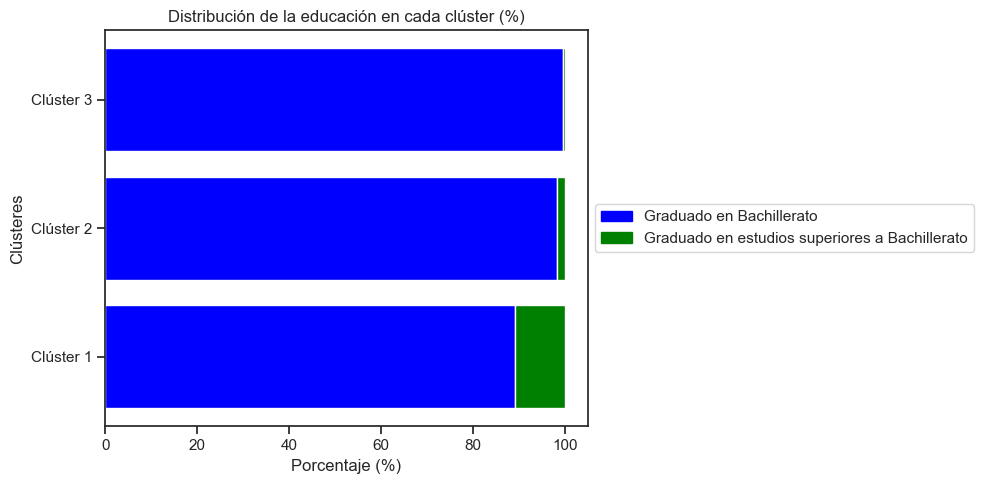

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))

cluster_labels = []
education_labels = ['Graduado en Bachillerato', 'Graduado en estudios superiores a Bachillerato']
colors = ['blue', 'green']

for i in range(1, 4):
    cluster_data = datos_todos_anios[datos_todos_anios['cluster'] == i]
    sector_counts = cluster_data['N_EDUCAC'].value_counts()
    selected_values = sector_counts.reindex([0, 2]).fillna(0)
    total_count = selected_values.sum()
    selected_values = (selected_values / total_count) * 100
    bottom = 0
    for j, (label, value) in enumerate(selected_values.items()):
        ax.barh(i, value, left=bottom, color=colors[j])
        bottom += value

    cluster_labels.append(f'Clúster {i}')
ax.set_yticks(range(1, 4))
ax.set_yticklabels(cluster_labels)
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Clústeres')
ax.set_title('Distribución de la educación en cada clúster (%)')
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
ax.legend(legend_patches, education_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()